In [2]:
library(ggplot2)        # plotting & data
library(dplyr)          # data manipulation
library(tidyr)          # data re-shaping
library(magrittr)       # pipe operator
library(gridExtra)      # provides side-by-side plotting
library(dplyr)          # dplyr for pipe operations
library(moments)        # bonett.test for normality
library(ggQC)           # to create xMR and iMR charts
library(repr)           # change plot size
library(nortest)        # anderson darling test


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘magrittr’


The following object is masked from ‘package:tidyr’:

    extract



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [660]:
install.packages('nortest_1.0-4.tar.gz', repos = NULL, type = "source")

In [3]:
# Change plot size to 12 x 6
options(repr.plot.width=12, repr.plot.height=6)

### 96 CORE HEAD COMPARISON 

In [101]:
dfl_8chl <- list()
dfl_96cr <- list()
chl8_file <- "rscript_data/2021-06-18_CELL_COUNT_8CHL_Plate"
cr96_file <- "rscript_data/2021-06-18_CELL_COUNT_96CR_Plate"
fi_suffix <- ".csv"
ratio_factor <- 30/50 # 30ul/50ul due to first well injection testing

for (i in seq(3)) {
    dfl_8chl[[i]] <- read.csv(paste0(chl8_file, i, fi_suffix))
    # scale down the first A1 well
    dfl_8chl[[i]][1,"Z"] <- dfl_8chl[[1]][1,"Z"]*ratio_factor
    dfl_96cr[[i]] <- read.csv(paste0(cr96_file, i, fi_suffix))
    dfl_96cr[[i]][1,"Z"] <- dfl_96cr[[1]][1,"Z"]*ratio_factor
    }

#### compare two groups at a time for the variance using F test

In [534]:
cell_cnts_8chl <- list()
cell_cnts_96cr <- list()

# discount first well since it was testing at 50 ul injection
for (i in seq(3)) {
    cell_cnts_8chl[[i]] <- dfl_8chl[[i]][dfl_8chl[[i]]$Z>100,]$Z[2:64]
    cell_cnts_96cr[[i]] <- dfl_96cr[[i]][dfl_96cr[[i]]$Z>100,]$Z[2:64]
    }

In [535]:
#check lengths are equal
length(unique(sapply(cell_cnts_8chl, length))) == 1

[1] TRUE

In [536]:
# merge set 1 and 2 from 8 chl ds
df_cmpr12 <- data.frame(`counts` = c(cell_cnts_8chl[[1]], cell_cnts_8chl[[2]]), `group` = c(rep(1, 63), rep(2, 63)))
head(df_cmpr12)

,counts,group
,<dbl>,<dbl>
1,2500,1
2,2422,1
3,2821,1
4,2429,1
5,2451,1
6,3022,1


In [537]:
# merge set 2 and 3 from 8 chl ds
df_cmpr23 <- data.frame(`counts` = c(cell_cnts_8chl[[2]], cell_cnts_8chl[[3]]), `group` = c(rep(1, 63), rep(2, 63)))
head(df_cmpr23)

,counts,group
,<dbl>,<dbl>
1,1613,1
2,1897,1
3,1698,1
4,1711,1
5,1703,1
6,1814,1


In [538]:
# merge set 1 and 3 from 8 chl ds
df_cmpr13 <- data.frame(`counts` = c(cell_cnts_8chl[[1]], cell_cnts_8chl[[3]]), `group` = c(rep(1, 63), rep(2, 63)))
head(df_cmpr13)

,counts,group
,<dbl>,<dbl>
1,2500,1
2,2422,1
3,2821,1
4,2429,1
5,2451,1
6,3022,1


- The p values get smaller, meaning the variances change more so from plate 1 to 3
- Run F-test when you want to perform a two samples t-test to check the equality of the variances of the two samples

In [539]:
# cmpr 1 & 3
var.test(counts ~ group, df_cmpr13)


	F test to compare two variances

data:  counts by group
F = 3.4765, num df = 62, denom df = 62, p-value = 2.127e-06
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 2.103494 5.745835
sample estimates:
ratio of variances 
           3.47654 


In [540]:
# cmpr 1 & 2
var.test(counts ~ group, df_cmpr12)


	F test to compare two variances

data:  counts by group
F = 2.5391, num df = 62, denom df = 62, p-value = 0.0003294
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 1.536297 4.196498
sample estimates:
ratio of variances 
          2.539108 


In [541]:
# cmpr 2 & 3
var.test(counts ~ group, df_cmpr23)


	F test to compare two variances

data:  counts by group
F = 1.3692, num df = 62, denom df = 62, p-value = 0.2188
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.8284384 2.2629349
sample estimates:
ratio of variances 
          1.369198 


### Shapiro test
the shapiro.test, the null hypothesis assumes that the data is drawn from a normal distribution. Since the p-value > 0.05, we fail to reject the null hypothesis, meaning that it is likely that the data is drawn from a normal distribution

In [542]:
shapiro.test(cell_cnts_8chl[[1]])


	Shapiro-Wilk normality test

data:  cell_cnts_8chl[[1]]
W = 0.98852, p-value = 0.8253


In [543]:
shapiro.test(cell_cnts_8chl[[2]])


	Shapiro-Wilk normality test

data:  cell_cnts_8chl[[2]]
W = 0.97913, p-value = 0.3604


In [544]:
shapiro.test(cell_cnts_8chl[[3]])


	Shapiro-Wilk normality test

data:  cell_cnts_8chl[[3]]
W = 0.98076, p-value = 0.4282


### Anderson-Darling test

In [662]:
ad.test(cell_cnts_8chl[[1]])


	Anderson-Darling normality test

data:  cell_cnts_8chl[[1]]
A = 0.20368, p-value = 0.8702


In [663]:
ad.test(cell_cnts_8chl[[2]])


	Anderson-Darling normality test

data:  cell_cnts_8chl[[2]]
A = 0.29313, p-value = 0.5919


In [664]:
ad.test(cell_cnts_8chl[[3]])


	Anderson-Darling normality test

data:  cell_cnts_8chl[[3]]
A = 0.34929, p-value = 0.4639


In [666]:
ad.test(cell_cnts_96cr[[1]])


	Anderson-Darling normality test

data:  cell_cnts_96cr[[1]]
A = 0.256, p-value = 0.7141


In [665]:
ad.test(cell_cnts_96cr[[2]])


	Anderson-Darling normality test

data:  cell_cnts_96cr[[2]]
A = 1.5253, p-value = 0.0005652


In [667]:
ad.test(cell_cnts_96cr[[3]])


	Anderson-Darling normality test

data:  cell_cnts_96cr[[3]]
A = 0.73269, p-value = 0.05333


### qq-plot
Q-Q plot is a scatterplot created by plotting two sets of quantiles against one another. If both sets of quantiles came from the same distribution, we should see the points forming a line that's roughly straight

In [545]:
p_qq_8chl_ls <- list()
p_qq_96cr_ls <- list()

for (i in seq(3)) {
    p_qq_8chl_ls[[i]] <- ggplot(data.frame(cnt = cell_cnts_8chl[[i]]), aes(sample = cnt)) + 
                    stat_qq() + stat_qq_line()
    p_qq_96cr_ls[[i]] <- ggplot(data.frame(cnt = cell_cnts_96cr[[i]]), aes(sample = cnt)) + 
                    stat_qq() + stat_qq_line()
    }

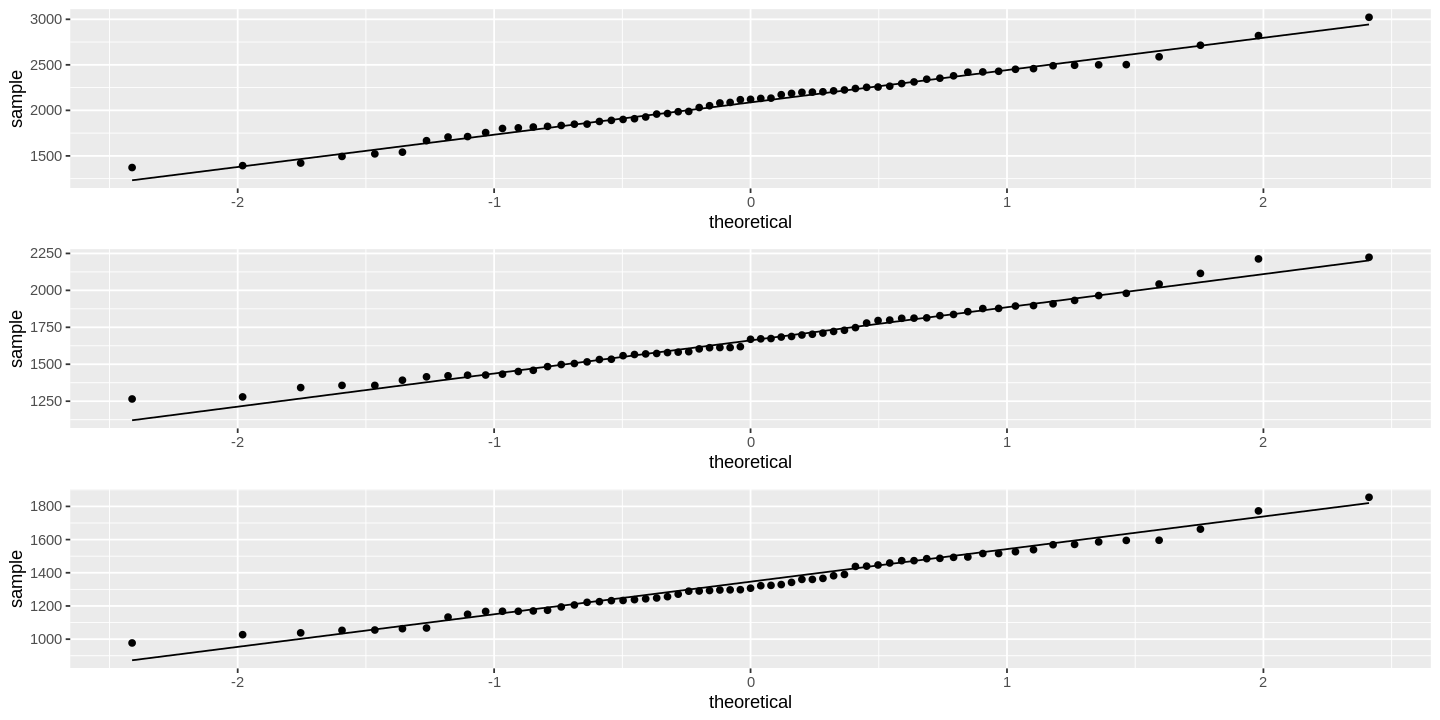

In [546]:
# 8 chl qq plots
grid.arrange(p_qq_8chl_ls[[1]],p_qq_8chl_ls[[2]], p_qq_8chl_ls[[3]], nrow = 3)

In [113]:
pp<-arrangeGrob(grobs = p_qq_8chl_ls, ncol=1)
ggsave(filename = 'grid_qq_8chl.png', plot = pp, scale = 1, width = 350, units = "mm", dpi = 300)

Saving 350 x 169 mm image



As all the points fall approximately along this reference line, we can assume normality.

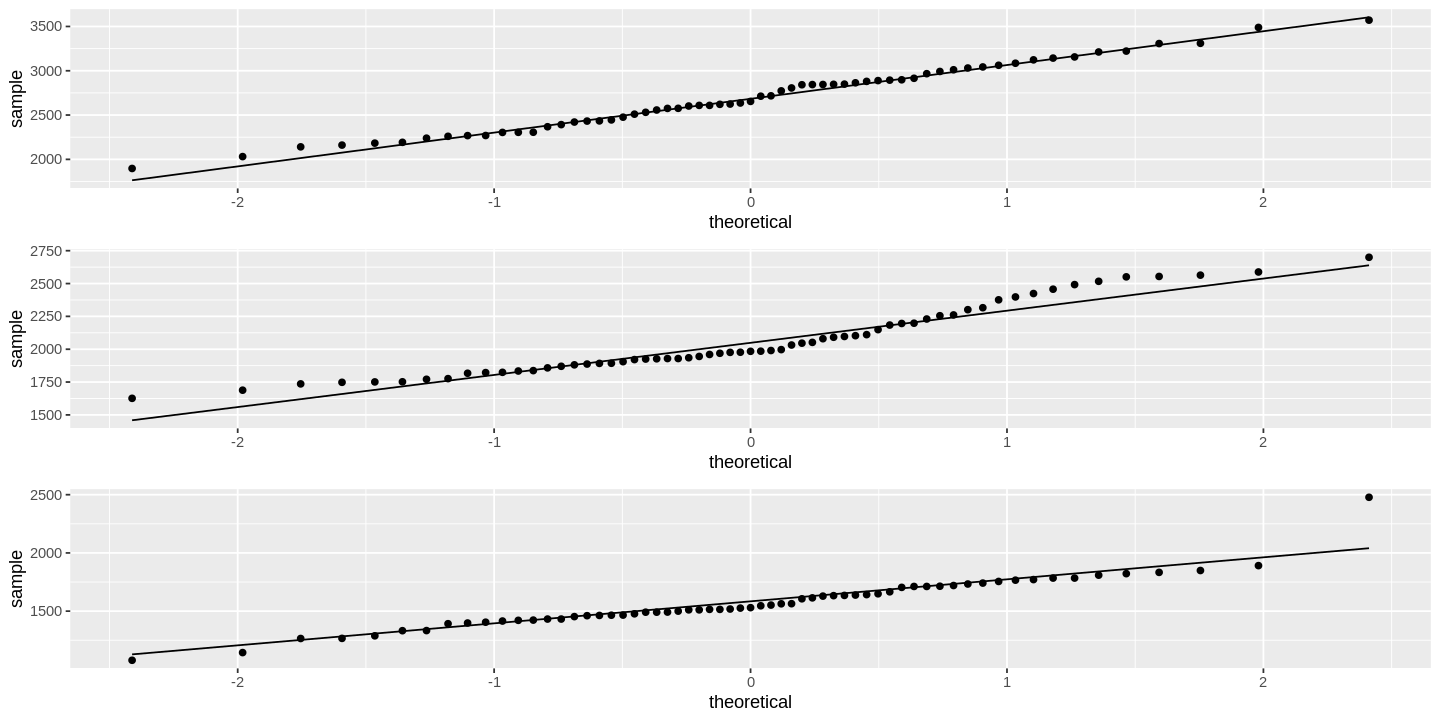

In [547]:
# 96 CORE qq plots
grid.arrange(p_qq_96cr_ls[[1]],p_qq_96cr_ls[[2]], p_qq_96cr_ls[[3]], nrow = 3)

### Histogram with density line plot

In [652]:
p_hst_8chl <- list()
p_hst_96cr <- list()

for (i in seq(3)) {
    dfh <- data.frame(cnt = cell_cnts_8chl[[i]])
    #p_hst_8chl[[i]] <- ggplot(data.frame(`cnt`=cell_cnts_8chl[[i]]), aes(cnt)) +
    #        geom_histogram(bins = 15)
    p_hst_8chl[[i]] <- ggplot(dfh, aes(cnt)) +
      geom_histogram(aes(y = stat(density)), bins= 15) +
      stat_function(
        fun = dnorm, 
        args = list(mean = mean(dfh$cnt), sd = sd(dfh$cnt)), 
        lwd = 2, 
        col = '#1F629F'
      )
    #p_hst_96cr[[i]] <- ggplot(data.frame(`cnt`=cell_cnts_96cr[[i]]), aes(cnt)) +
    #        geom_histogram(bins = 15)
    dfh <- data.frame(cnt = cell_cnts_96cr[[i]])
    p_hst_96cr[[i]] <- ggplot(dfh, aes(cnt)) +
      geom_histogram(aes(y = stat(density)), bins= 15) +
      stat_function(
        fun = dnorm, 
        args = list(mean = mean(dfh$cnt), sd = sd(dfh$cnt)), 
        lwd = 2, 
        col = '#1F629F'
      )
    }

#### We also see similar skewness within the sample distributions.

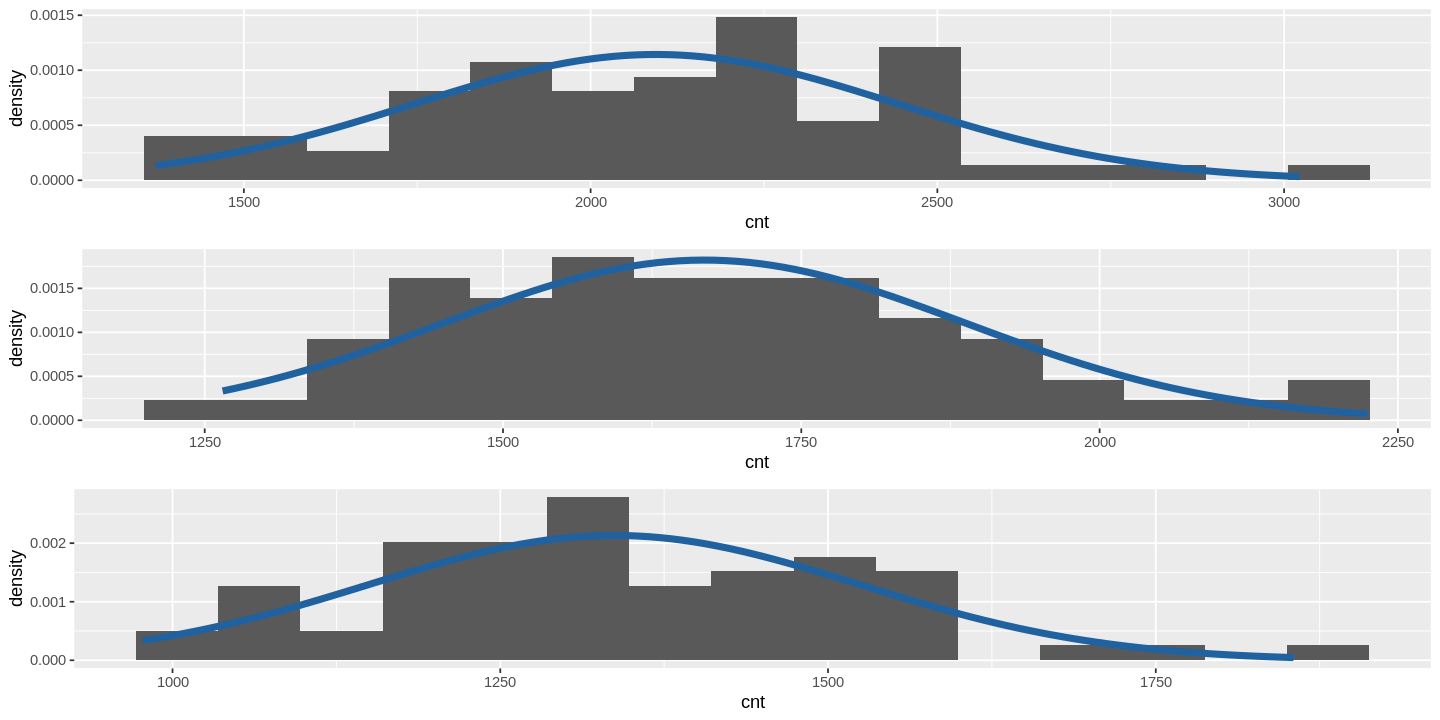

In [653]:
grid.arrange(p_hst_8chl[[1]], p_hst_8chl[[2]], p_hst_8chl[[3]], nrow = 3)

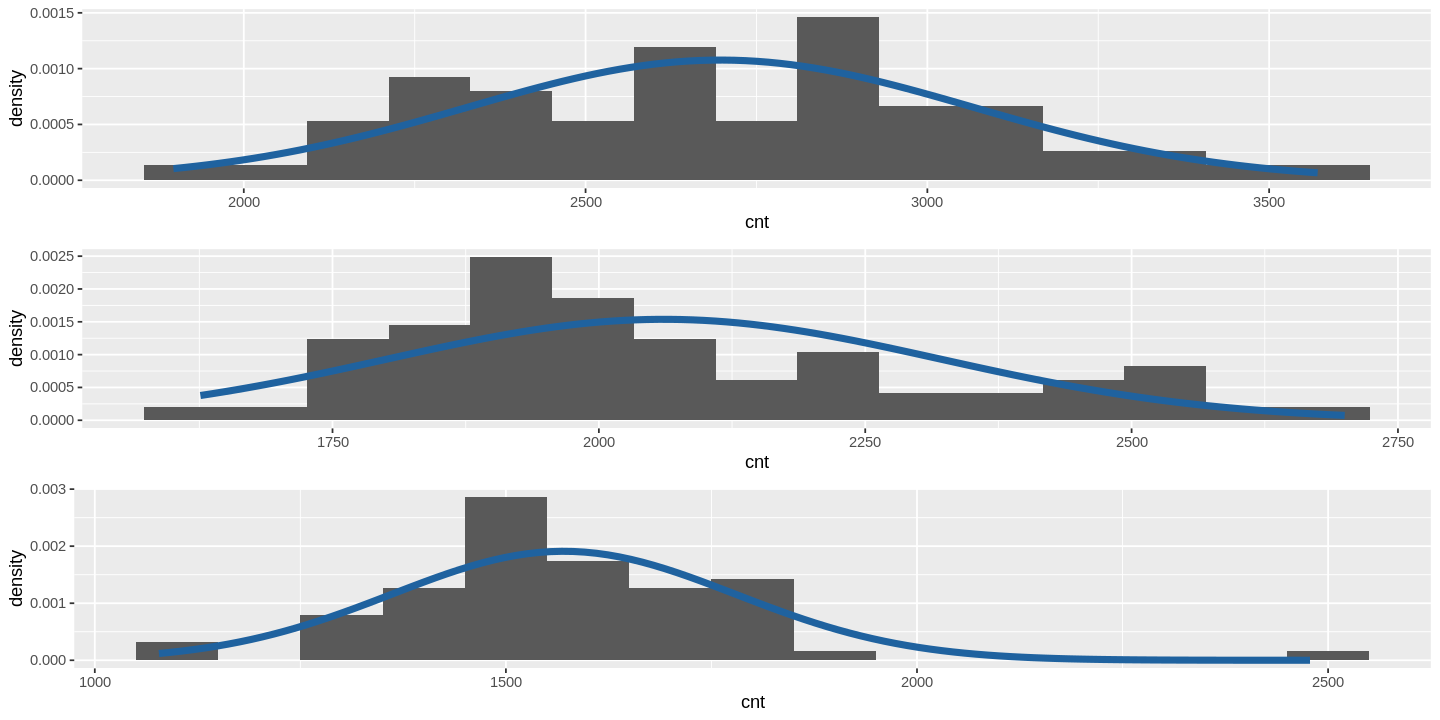

In [654]:
grid.arrange(p_hst_96cr[[1]], p_hst_96cr[[2]], p_hst_96cr[[3]], nrow = 3)

### Wilcoxon rank test

- check that the median of pairwise differences is different 
- non-parametric statistical test to compare 2 related samples, matched samples or repeated measurements on single sample to assess whether their population mean ranks differ 
- an alternative to t-test; this is when we can't assume the two populatios are normally distributed; determine wheterh two dependent samples were selected from populations have the same distribution
- analysis below shows using both wilcox and t-test the sample mean for intra-plate is very different

In [551]:
# assume not normal distribution
wilcox.test(x = cell_cnts_8chl[[1]], y = cell_cnts_8chl[[2]],
       alternative = "two.sided",
       paired = FALSE, var.equal = FALSE,
       conf.level = 0.95) 


	Wilcoxon rank sum test with continuity correction

data:  cell_cnts_8chl[[1]] and cell_cnts_8chl[[2]]
W = 3355.5, p-value = 2.278e-11
alternative hypothesis: true location shift is not equal to 0


In [552]:
wilcox.test(x = cell_cnts_8chl[[2]], y = cell_cnts_8chl[[3]],
       alternative = "two.sided",
       paired = FALSE, var.equal = FALSE,
       conf.level = 0.95) 


	Wilcoxon rank sum test with continuity correction

data:  cell_cnts_8chl[[2]] and cell_cnts_8chl[[3]]
W = 3480, p-value = 2.997e-13
alternative hypothesis: true location shift is not equal to 0


In [553]:
wilcox.test(x = cell_cnts_8chl[[1]], y = cell_cnts_8chl[[3]],
       alternative = "two.sided",
       paired = FALSE, var.equal = FALSE,
       conf.level = 0.95) 


	Wilcoxon rank sum test with continuity correction

data:  cell_cnts_8chl[[1]] and cell_cnts_8chl[[3]]
W = 3855, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


#### t test for inter plate sets

In [554]:
t.test(x = cell_cnts_8chl[[1]], y = cell_cnts_8chl[[2]],
       alternative = "two.sided",
       paired = FALSE, var.equal = FALSE,
       conf.level = 0.95) 


	Welch Two Sample t-test

data:  cell_cnts_8chl[[1]] and cell_cnts_8chl[[2]]
t = 8.1965, df = 104.28, p-value = 6.738e-13
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 322.4330 528.2337
sample estimates:
mean of x mean of y 
 2094.016  1668.683 


In [555]:
t.test(x = cell_cnts_8chl[[2]], y = cell_cnts_8chl[[3]],
       alternative = "two.sided",
       paired = FALSE, var.equal = FALSE,
       conf.level = 0.95) 


	Welch Two Sample t-test

data:  cell_cnts_8chl[[2]] and cell_cnts_8chl[[3]]
t = 9.146, df = 121.06, p-value = 1.737e-15
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 260.0229 403.6914
sample estimates:
mean of x mean of y 
 1668.683  1336.825 


In [556]:
t.test(x = cell_cnts_8chl[[1]], y = cell_cnts_8chl[[3]],
       alternative = "two.sided",
       paired = FALSE, var.equal = T,
       conf.level = 0.95) 


	Two Sample t-test

data:  cell_cnts_8chl[[1]] and cell_cnts_8chl[[3]]
t = 15.181, df = 124, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 658.4721 855.9089
sample estimates:
mean of x mean of y 
 2094.016  1336.825 


In [557]:
df.8chl.cmb <- data.frame(`count` = unlist(cell_cnts_8chl), 
                          `group` = c(rep("Plate 1", 63), 
                                      rep("Plate 2", 63), 
                                      rep("Plate 3", 63)))
head(df.8chl.cmb)

,count,group
,<dbl>,<chr>
1,2500,Plate 1
2,2422,Plate 1
3,2821,Plate 1
4,2429,Plate 1
5,2451,Plate 1
6,3022,Plate 1


In [558]:
df.96cr.cmb <- data.frame(`count` = unlist(cell_cnts_96cr),
                          `group` = c(rep("Plate 1", 63),
                                      rep("Plate 2", 63),
                                      rep("Plate 3", 63)))
head(df.96cr.cmb)

,count,group
,<dbl>,<chr>
1,3222,Plate 1
2,3310,Plate 1
3,3062,Plate 1
4,3123,Plate 1
5,3143,Plate 1
6,2992,Plate 1


In [559]:
summary(df.96cr.cmb$count)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1078    1704    1984    2109    2517    3571 

In [560]:
summary(df.8chl.cmb$count)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    977    1392    1613    1700    1932    3022 

#### Box plots for n=3 plates

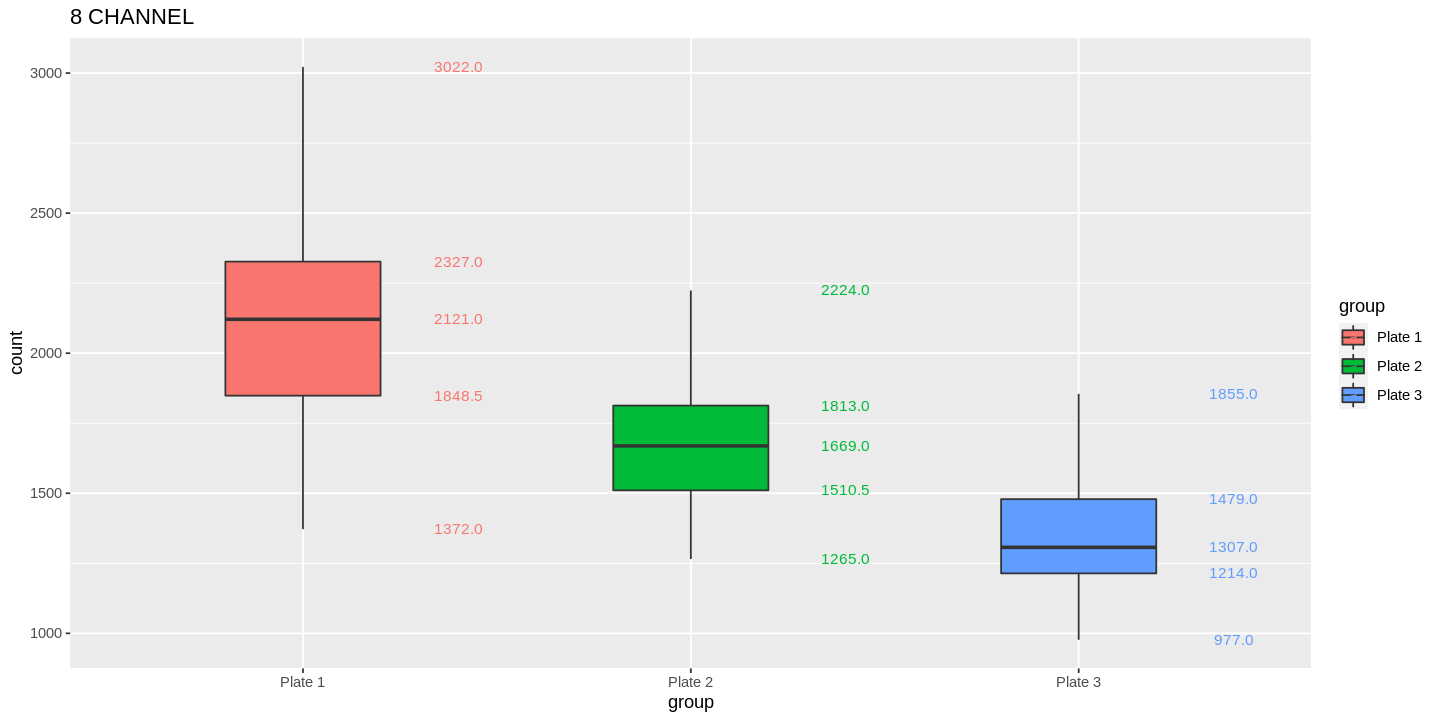

In [561]:
ggplot(df.8chl.cmb, aes(group, count,fill=group)) +
    geom_boxplot(width = 0.4) + 
    stat_summary(geom="text", fun=quantile,
           aes(label=sprintf("%1.1f", ..y..), color=group),
           position=position_nudge(x=0.4), size=3.25) +
    ggtitle("8 CHANNEL")

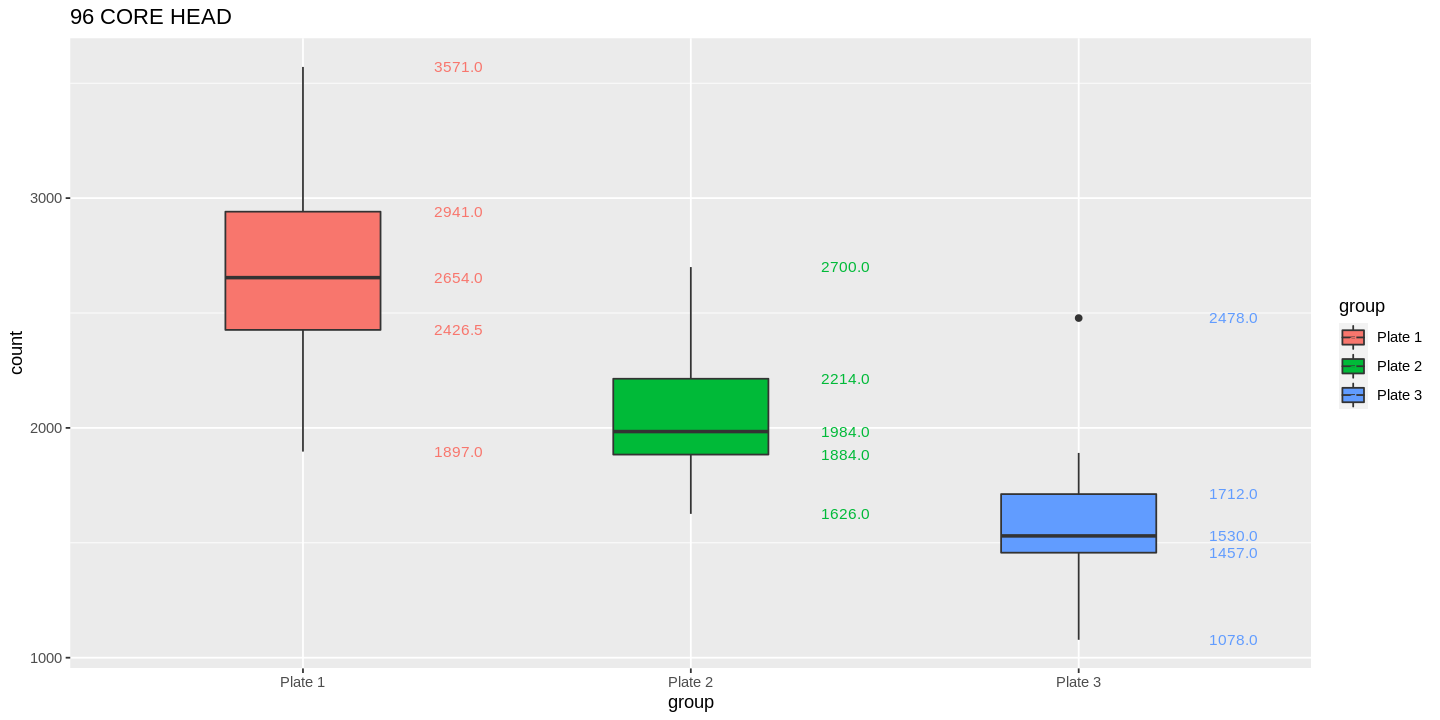

In [562]:
ggplot(df.96cr.cmb, aes(group, count, fill=group)) +
    geom_boxplot(width = 0.4) +
    stat_summary(geom="text", fun=quantile,
           aes(label=sprintf("%1.1f", ..y..), color=group),
           position=position_nudge(x=0.4), size=3.25) +
    ggtitle("96 CORE HEAD")

In [565]:
# pool all three sets and run t-test to compare 
t.test(df.8chl.cmb$count, df.96cr.cmb$count, 
       alternative = "two.sided",
       paired = FALSE, var.equal = FALSE,
       conf.level = 0.95) 


	Welch Two Sample t-test

data:  df.8chl.cmb$count and df.96cr.cmb$count
t = -8.3043, df = 347.46, p-value = 2.267e-15
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -506.6605 -312.6199
sample estimates:
mean of x mean of y 
 1699.841  2109.481 


In [566]:
# t-test on plate 1 of both 8 channel & 96 CORE
t.test(cell_cnts_8chl[[1]], cell_cnts_96cr[[1]],
       alternative = "two.sided",
       paired = FALSE, var.equal = F,
       conf.level = 0.95) 


	Welch Two Sample t-test

data:  cell_cnts_8chl[[1]] and cell_cnts_96cr[[1]]
t = -9.4096, df = 123.56, p-value = 3.488e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -730.1505 -476.3574
sample estimates:
mean of x mean of y 
 2094.016  2697.270 


In [567]:
# t-test on plate 2 of both 8 channel & 96 CORE
t.test(cell_cnts_8chl[[2]], cell_cnts_96cr[[2]],
       alternative = "two.sided",
       paired = FALSE, var.equal = F,
       conf.level = 0.95) 


	Welch Two Sample t-test

data:  cell_cnts_8chl[[2]] and cell_cnts_96cr[[2]]
t = -9.1719, df = 120.59, p-value = 1.551e-15
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -476.9449 -307.5947
sample estimates:
mean of x mean of y 
 1668.683  2060.952 


In [568]:
# t-test on plate 3 of both 8 channel & 96 CORE
t.test(cell_cnts_8chl[[3]], cell_cnts_96cr[[3]],
       alternative = "two.sided",
       paired = FALSE, var.equal = F,
       conf.level = 0.95) 


	Welch Two Sample t-test

data:  cell_cnts_8chl[[3]] and cell_cnts_96cr[[3]]
t = -6.6067, df = 122.53, p-value = 1.073e-09
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -303.3278 -163.4658
sample estimates:
mean of x mean of y 
 1336.825  1570.222 


In [569]:
colnames(df.8chl.cmb) <- c('cnt', 'group')

In [651]:
suppressMessages(group_by(df.8chl.cmb, group) %>%
  summarise(
    count = n(),
    mean = mean(`cnt`),
    sd = sd(`cnt`)
  ))

group,count,mean,sd
<chr>,<int>,<dbl>,<dbl>
Plate 1,63,2094.016,348.8698
Plate 2,63,1668.683,218.9389
Plate 3,63,1336.825,187.1069


#### ANOVA test for each set of three plates

In [571]:
# Compute the analysis of variance for 8 channel
res.aov.8chl <- aov(cnt ~ group, data = df.8chl.cmb)
# Summary of the analysis
summary(res.aov.8chl)
# As the p-value is less than the significance level 0.05, 
# we can conclude that there are significant differences between the 
# groups highlighted with “*" in the model summary

             Df   Sum Sq Mean Sq F value Pr(>F)    
group         2 18151876 9075938     133 <2e-16 ***
Residuals   186 12688508   68218                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [572]:
colnames(df.96cr.cmb) <- c('cnt', 'group')

In [649]:
suppressMessages(group_by(df.96cr.cmb, group) %>%
  summarise(
    count = n(),
    mean = mean(`cnt`),
    sd = sd(`cnt`)
  ))

group,count,mean,sd
<chr>,<int>,<dbl>,<dbl>
Plate 1,63,2697.270,370.4422
Plate 2,63,2060.952,259.4297
Plate 3,63,1570.222,208.8455


In [574]:
# Compute the analysis of variance for 96 core head
res.aov.96cr <- aov(cnt ~ group, data = df.96cr.cmb)
# Summary of the analysis
summary(res.aov.96cr)
# As the p-value is less than the significance level 0.05, 
# we can conclude that there are significant differences between the 
# groups highlighted with “*" in the model summary

             Df   Sum Sq  Mean Sq F value Pr(>F)    
group         2 40234999 20117500   243.2 <2e-16 ***
Residuals   186 15385152    82716                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

- In one-way ANOVA test, a significant p-value indicates that some of the group means are different, but we don’t know which pairs of groups are different.

- It’s possible to perform multiple pairwise-comparison, to determine if the mean difference between specific pairs of group are statistically significant.

- Use the Tukey to conduct this

In [575]:
TukeyHSD(res.aov.96cr)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = cnt ~ group, data = df.96cr.cmb)

$group
                      diff        lwr        upr p adj
Plate 2-Plate 1  -636.3175  -757.3869  -515.2480     0
Plate 3-Plate 1 -1127.0476 -1248.1171 -1005.9782     0
Plate 3-Plate 2  -490.7302  -611.7996  -369.6607     0


In [576]:
TukeyHSD(res.aov.8chl)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = cnt ~ group, data = df.8chl.cmb)

$group
                     diff       lwr       upr p adj
Plate 2-Plate 1 -425.3333 -535.2818 -315.3849     0
Plate 3-Plate 1 -757.1905 -867.1389 -647.2421     0
Plate 3-Plate 2 -331.8571 -441.8056 -221.9087     0


In [577]:
pairwise.t.test(df.96cr.cmb$cnt, df.96cr.cmb$group,
                 p.adjust.method = "BH")
# pairewise.t.test() can be also used to calculate pairwise comparisons 
# between group levels with corrections for multiple testing
# The result is a table of p-values for the pairwise comparisons. 
# Here, the p-values have been adjusted by the Benjamini-Hochberg method.


	Pairwise comparisons using t tests with pooled SD 

data:  df.96cr.cmb$cnt and df.96cr.cmb$group 

        Plate 1 Plate 2
Plate 2 <2e-16  -      
Plate 3 <2e-16  <2e-16 

P value adjustment method: BH 

In [668]:
pairwise.t.test(df.8chl.cmb$cnt, df.8chl.cmb$group,
                 p.adjust.method = "BH")


	Pairwise comparisons using t tests with pooled SD 

data:  df.8chl.cmb$cnt and df.8chl.cmb$group 

        Plate 1 Plate 2
Plate 2 < 2e-16 -      
Plate 3 < 2e-16 2.1e-11

P value adjustment method: BH 

"residuals versus fits plot" is the most frequently created plot. It is a scatter plot of residuals on the y axis and fitted values (estimated responses) on the x axis. The plot is used to detect non-linearity, unequal error variances, and outliers.

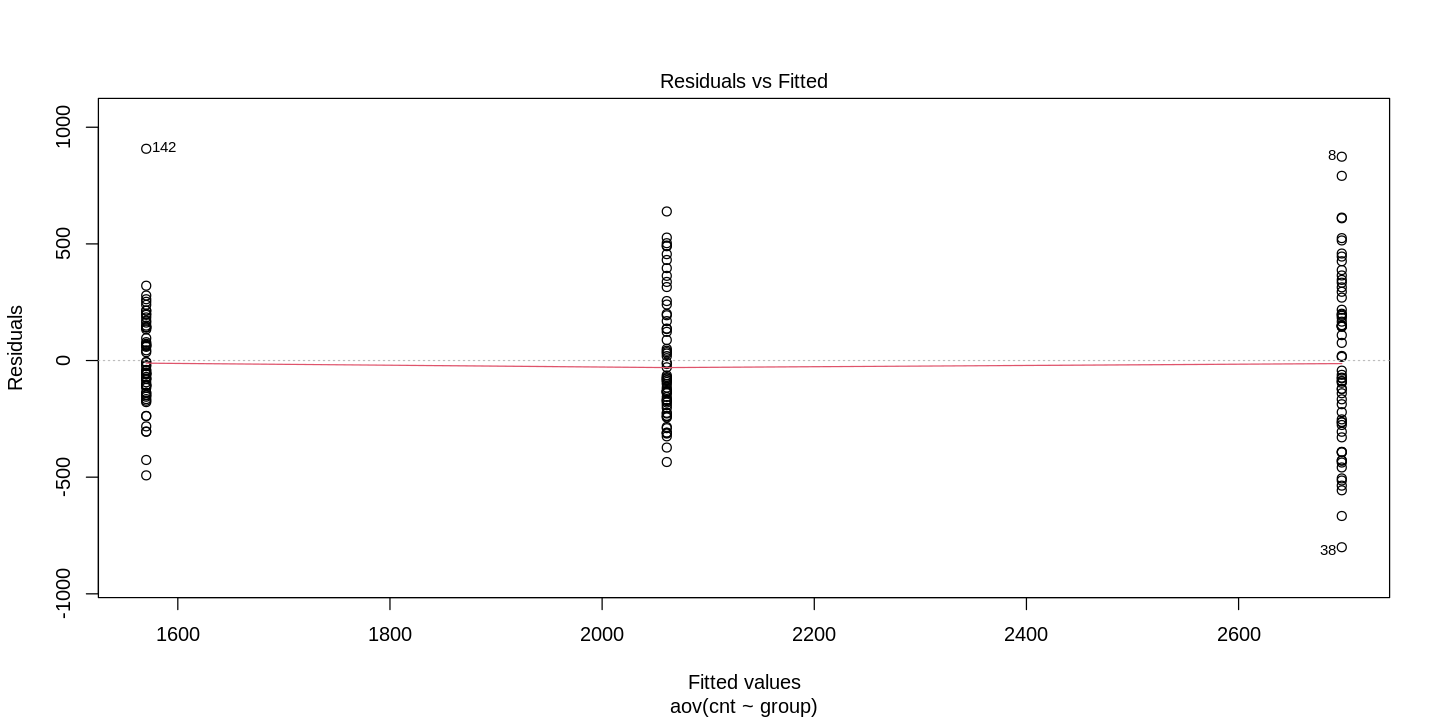

In [578]:
plot(res.aov.96cr, 1)

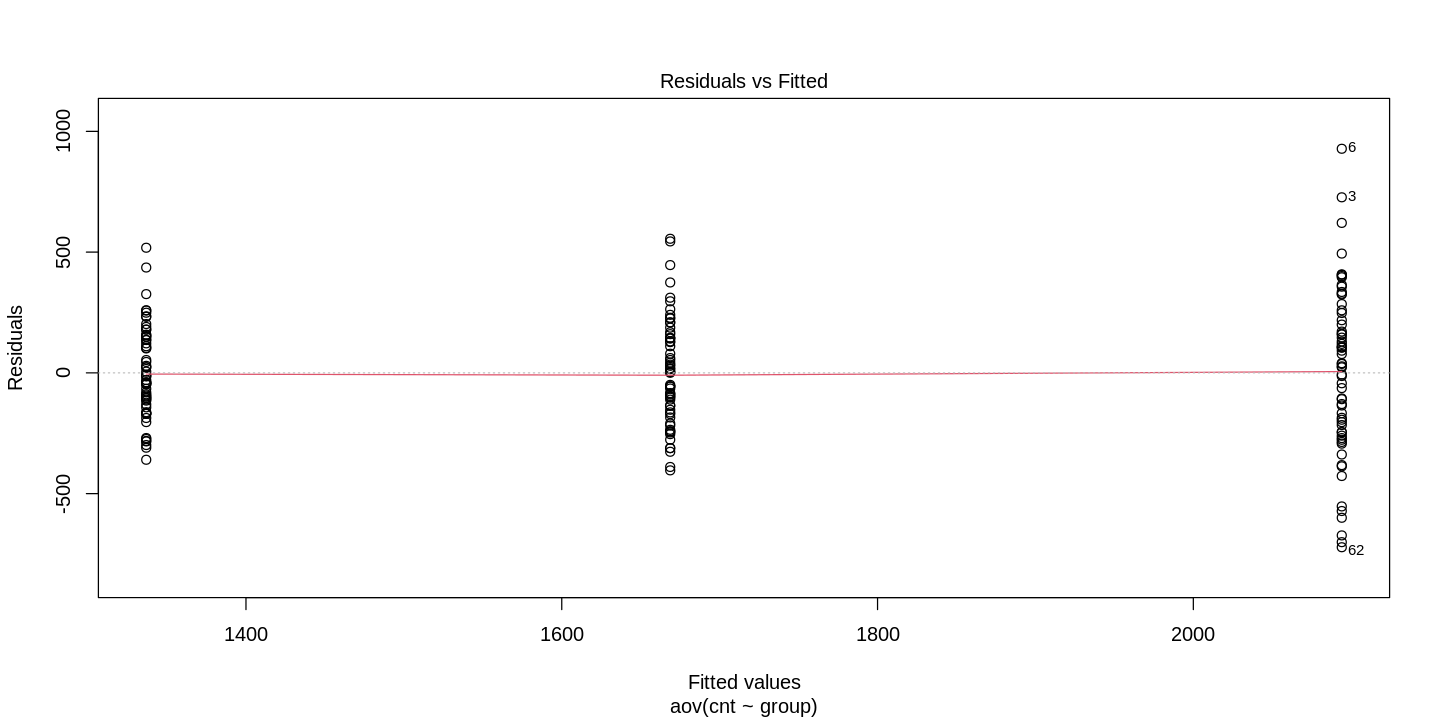

In [579]:
plot(res.aov.8chl, 1)

#### USE MFI AS SAMPLE DATA

In [4]:
parentdir <- "flowjo_data/96vs8/"

In [5]:
dfmfi_8chl <- list()
dfmfi_96cr <- list()
chl8_file <- list.files(parentdir, pattern = "New Sp.*Lymp*")
cr96_file <- list.files(parentdir, pattern = "96.*Lymp*")
for (i in seq(3)) {
    dfmfi_8chl[[i]] <- read.csv(paste0(parentdir, chl8_file[i])) %>% 
                            dplyr::filter(grepl('[A-H]0[2-9]|1[0-2])', Sample.)) %>%
                            mutate_at(vars(Lymph.MFI..., Stain.Index), funs(as.numeric))
    dfmfi_96cr[[i]] <- read.csv(paste0(parentdir, cr96_file[i])) %>% 
                            dplyr::filter(grepl('[A-H]0[2-9]|1[0-2])', Sample.)) %>%
                            mutate_at(vars(Lymph.MFI..., Stain.Index), funs(as.numeric))
    }

Warning message:
“`funs()` is deprecated as of dplyr 0.8.0.
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


In [56]:
# for flowjo data
mfi.pos.8chl <- list()
mfi.pos.96cr <- list()

for (i in seq(3)) {
    mfi.pos.8chl[[i]] <- data.frame(`mfi+`= dfmfi_8chl[[i]]$Lymph.MFI..., group = rep(paste0("Plate ", i), 56))
    mfi.pos.96cr[[i]] <- data.frame(`mfi+` = dfmfi_96cr[[i]]$Lymph.MFI..., group = rep(paste0("Plate ", i), 56))
    }

In [57]:
df_mfi_cmb_8chl_12 <- rbind(mfi.pos.8chl[[1]], mfi.pos.8chl[[2]])
df_mfi_cmb_8chl_23 <- rbind(mfi.pos.8chl[[2]], mfi.pos.8chl[[3]])
df_mfi_cmb_8chl_13 <- rbind(mfi.pos.8chl[[1]], mfi.pos.8chl[[3]])
df_mfi_cmb_96cr_12 <- rbind(mfi.pos.96cr[[1]], mfi.pos.96cr[[2]])
df_mfi_cmb_96cr_23 <- rbind(mfi.pos.96cr[[2]], mfi.pos.96cr[[3]])
df_mfi_cmb_96cr_13 <- rbind(mfi.pos.96cr[[1]], mfi.pos.96cr[[3]])

#### F test for normality
The p values are big, meaning the variances do not change more from plate 1 to 3

In [58]:
var.test(mfi. ~ group, df_mfi_cmb_8chl_12)


	F test to compare two variances

data:  mfi. by group
F = 0.95543, num df = 55, denom df = 55, p-value = 0.8664
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.5600802 1.6298461
sample estimates:
ratio of variances 
          0.955429 


In [59]:
var.test(mfi. ~ group, df_mfi_cmb_8chl_13)


	F test to compare two variances

data:  mfi. by group
F = 0.50814, num df = 55, denom df = 55, p-value = 0.01329
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.2978782 0.8668323
sample estimates:
ratio of variances 
         0.5081441 


In [60]:
var.test(mfi. ~ group, df_mfi_cmb_8chl_23)


	F test to compare two variances

data:  mfi. by group
F = 0.53185, num df = 55, denom df = 55, p-value = 0.02079
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.3117743 0.9072702
sample estimates:
ratio of variances 
         0.5318492 


In [61]:
var.test(mfi. ~ group, df_mfi_cmb_96cr_12)


	F test to compare two variances

data:  mfi. by group
F = 1.2563, num df = 55, denom df = 55, p-value = 0.4001
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.736480 2.143173
sample estimates:
ratio of variances 
          1.256346 


In [62]:
var.test(mfi. ~ group, df_mfi_cmb_96cr_13)


	F test to compare two variances

data:  mfi. by group
F = 0.17689, num df = 55, denom df = 55, p-value = 1.43e-09
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.1036924 0.3017473
sample estimates:
ratio of variances 
         0.1768867 


In [63]:
var.test(mfi. ~ group, df_mfi_cmb_96cr_23)


	F test to compare two variances

data:  mfi. by group
F = 0.14079, num df = 55, denom df = 55, p-value = 1.392e-11
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.08253495 0.24017857
sample estimates:
ratio of variances 
         0.1407946 


#### Anderson-Darling test
- goodness of fit test that measures how well your data fit a specified distribution.
- H_0: The data follow a specified distribution

In [64]:
ad.test(mfi.pos.8chl[[1]]$mfi.)


	Anderson-Darling normality test

data:  mfi.pos.8chl[[1]]$mfi.
A = 0.54548, p-value = 0.1539


In [65]:
ad.test(mfi.pos.8chl[[2]]$mfi.)


	Anderson-Darling normality test

data:  mfi.pos.8chl[[2]]$mfi.
A = 0.39684, p-value = 0.3578


In [66]:
ad.test(mfi.pos.8chl[[3]]$mfi.)


	Anderson-Darling normality test

data:  mfi.pos.8chl[[3]]$mfi.
A = 0.16111, p-value = 0.9441


In [67]:
ad.test(mfi.pos.96cr[[1]]$mfi.)


	Anderson-Darling normality test

data:  mfi.pos.96cr[[1]]$mfi.
A = 0.59785, p-value = 0.1152


In [68]:
ad.test(mfi.pos.96cr[[2]]$mfi.)


	Anderson-Darling normality test

data:  mfi.pos.96cr[[2]]$mfi.
A = 0.24106, p-value = 0.7626


In [70]:
ad.test(mfi.pos.96cr[[3]]$mfi.)


	Anderson-Darling normality test

data:  mfi.pos.96cr[[3]]$mfi.
A = 6.247, p-value = 1.51e-15


#### Shapiro test, bonett test, qq plot to show normality
- shapiro-wilk test - tell if a random sample comes from a normal distribution
- bonett test - measure of kurtosis for normally distributed data

In [71]:
p_qq_8chl_mfi <- list()
p_qq_96cr_mfi <- list()
p_hst_8chl_mfi <- list()
p_hst_96cr_mfi <- list()
df_violin_96cr_mfi <- list()
df_violin_8chl_mfi <- list()

df <- dfmfi_8chl[[1]] %>% select(Lymph.MFI...) %>% mutate(group = "Plate 1")
df_violin_8chl_mfi[[1]] <- df
p_qq_8chl_mfi[[1]] <- ggplot(data.frame(mfi = df$`Lymph.MFI...`), aes(sample = mfi)) + 
                stat_qq() + stat_qq_line()
p_hst_8chl_mfi[[1]] <- ggplot(data.frame(mfi = df$`Lymph.MFI...`), aes(mfi)) +
      geom_histogram(aes(y = stat(density)), bins= 15) +
      stat_function(
        fun = dnorm, 
        args = list(mean = mean(df$`Lymph.MFI...`), sd = sd(df$`Lymph.MFI...`)), 
        lwd = 2, 
        col = '#1F629F'
      )
shap_res <- shapiro.test(df[['Lymph.MFI...']])
bon_res <- bonett.test(df[['Lymph.MFI...']])
shap_res


	Shapiro-Wilk normality test

data:  df[["Lymph.MFI..."]]
W = 0.97246, p-value = 0.2272


In [72]:
# Under the hypothesis of normality, data should have Geary's kurtosis equal to sqrt(2/pi) (0.7979)
bon_res


	Bonett-Seier test for Geary kurtosis

data:  df[["Lymph.MFI..."]]
tau = 393.76786, z = 0.66049, p-value = 0.5089
alternative hypothesis: kurtosis is not equal to sqrt(2/pi)


In [73]:
# the kurtosis is near .7979, with p-value barely above 0.05, indicating it is slightly normal
geary(df$`Lymph.MFI...`)

[1] 0.779709

In [74]:
df <- dfmfi_96cr[[1]] %>% select(Lymph.MFI...) %>% mutate(group = "Plate 1")
df_violin_96cr_mfi[[1]] <- df
p_qq_96cr_mfi[[1]] <- ggplot(data.frame(mfi = df$`Lymph.MFI...`), aes(sample = mfi)) + 
                stat_qq() + stat_qq_line()
p_hst_96cr_mfi[[1]] <- ggplot(data.frame(mfi = df$`Lymph.MFI...`), aes(mfi)) +
      geom_histogram(aes(y = stat(density)), bins= 15) +
      stat_function(
        fun = dnorm, 
        args = list(mean = mean(df$`Lymph.MFI...`), sd = sd(df$`Lymph.MFI...`)), 
        lwd = 2, 
        col = '#1F629F'
      )
shap_res <- shapiro.test(df[['Lymph.MFI...']])
bon_res <- bonett.test(df[['Lymph.MFI...']])
shap_res


	Shapiro-Wilk normality test

data:  df[["Lymph.MFI..."]]
W = 0.97259, p-value = 0.2302


In [75]:
bon_res


	Bonett-Seier test for Geary kurtosis

data:  df[["Lymph.MFI..."]]
tau = 503.7264, z = -1.9308, p-value = 0.05351
alternative hypothesis: kurtosis is not equal to sqrt(2/pi)


In [76]:
geary(df$`Lymph.MFI...`)

[1] 0.8536756

In [77]:
df <- dfmfi_8chl[[2]] %>% select(Lymph.MFI...) %>% mutate(group = "Plate 2")
df_violin_8chl_mfi[[2]] <- df
p_qq_8chl_mfi[[2]] <- ggplot(data.frame(mfi = df$`Lymph.MFI...`), aes(sample = mfi)) + 
                stat_qq() + stat_qq_line()
p_hst_8chl_mfi[[2]] <- ggplot(data.frame(mfi = df$`Lymph.MFI...`), aes(mfi)) +
      geom_histogram(aes(y = stat(density)), bins= 15) +
      stat_function(
        fun = dnorm, 
        args = list(mean = mean(df$`Lymph.MFI...`), sd = sd(df$`Lymph.MFI...`)), 
        lwd = 2, 
        col = '#1F629F'
      )

shap_res <- shapiro.test(df[['Lymph.MFI...']])
bon_res <- bonett.test(df[['Lymph.MFI...']])
shap_res


	Shapiro-Wilk normality test

data:  df[["Lymph.MFI..."]]
W = 0.97125, p-value = 0.2005


In [78]:
bon_res


	Bonett-Seier test for Geary kurtosis

data:  df[["Lymph.MFI..."]]
tau = 397.8048, z = 1.0207, p-value = 0.3074
alternative hypothesis: kurtosis is not equal to sqrt(2/pi)


In [79]:
geary(df$`Lymph.MFI...`)

[1] 0.7699483

In [80]:
df <- dfmfi_96cr[[2]] %>% select(Lymph.MFI...) %>% mutate(group = "Plate 2")
df_violin_96cr_mfi[[2]] <- df
p_qq_96cr_mfi[[2]] <- ggplot(data.frame(mfi = df$`Lymph.MFI...`), aes(sample = mfi)) +
                stat_qq() + stat_qq_line()
p_hst_96cr_mfi[[2]] <- ggplot(data.frame(mfi = df$`Lymph.MFI...`), aes(mfi)) +
      geom_histogram(aes(y = stat(density)), bins= 15) +
      stat_function(
        fun = dnorm, 
        args = list(mean = mean(df$`Lymph.MFI...`), sd = sd(df$`Lymph.MFI...`)), 
        lwd = 2, 
        col = '#1F629F'
      )

shap_res <- shapiro.test(df[['Lymph.MFI...']])
bon_res <- bonett.test(df[['Lymph.MFI...']])
shap_res


	Shapiro-Wilk normality test

data:  df[["Lymph.MFI..."]]
W = 0.99012, p-value = 0.9267


In [81]:
bon_res


	Bonett-Seier test for Geary kurtosis

data:  df[["Lymph.MFI..."]]
tau = 413.11543, z = 0.47671, p-value = 0.6336
alternative hypothesis: kurtosis is not equal to sqrt(2/pi)


In [82]:
geary(df$`Lymph.MFI...`)

[1] 0.784737

In [83]:
df <- dfmfi_8chl[[3]] %>% select(Lymph.MFI...) %>% mutate(group = "Plate 3")
df_violin_8chl_mfi[[3]] <- df
p_qq_8chl_mfi[[3]] <- ggplot(data.frame(mfi = df$`Lymph.MFI...`), aes(sample = mfi)) + 
                stat_qq() + stat_qq_line()
p_hst_8chl_mfi[[3]] <- ggplot(data.frame(mfi = df$`Lymph.MFI...`), aes(mfi)) +
      geom_histogram(aes(y = stat(density)), bins= 15) +
      stat_function(
        fun = dnorm, 
        args = list(mean = mean(df$`Lymph.MFI...`), sd = sd(df$`Lymph.MFI...`)), 
        lwd = 2, 
        col = '#1F629F'
      )

shap_res <- shapiro.test(df[['Lymph.MFI...']])
bon_res <- bonett.test(df[['Lymph.MFI...']])
shap_res


	Shapiro-Wilk normality test

data:  df[["Lymph.MFI..."]]
W = 0.98787, p-value = 0.8443


In [84]:
bon_res


	Bonett-Seier test for Geary kurtosis

data:  df[["Lymph.MFI..."]]
tau = 576.19643, z = -0.54584, p-value = 0.5852
alternative hypothesis: kurtosis is not equal to sqrt(2/pi)


In [85]:
geary(df$`Lymph.MFI...`)

[1] 0.8133103

In [86]:
df <- dfmfi_96cr[[3]] %>% select(Lymph.MFI...) %>% mutate(group = "Plate 3")
df_violin_96cr_mfi[[3]] <- df
p_qq_96cr_mfi[[3]] <- ggplot(data.frame(mfi = df$`Lymph.MFI...`), aes(sample = mfi)) +
                stat_qq() + stat_qq_line()
p_hst_96cr_mfi[[3]] <- ggplot(data.frame(mfi = df$`Lymph.MFI...`), aes(mfi)) +
      geom_histogram(aes(y = stat(density)), bins= 15) +
      stat_function(
        fun = dnorm, 
        args = list(mean = mean(df$`Lymph.MFI...`), sd = sd(df$`Lymph.MFI...`)), 
        lwd = 2, 
        col = '#1F629F'
      )

shap_res <- shapiro.test(df[['Lymph.MFI...']])
bon_res <- bonett.test(df[['Lymph.MFI...']])
shap_res


	Shapiro-Wilk normality test

data:  df[["Lymph.MFI..."]]
W = 0.48556, p-value = 1.013e-12


In [87]:
bon_res


	Bonett-Seier test for Geary kurtosis

data:  df[["Lymph.MFI..."]]
tau = 651.22, z = 15.49, p-value < 2.2e-16
alternative hypothesis: kurtosis is not equal to sqrt(2/pi)


In [88]:
geary(df$`Lymph.MFI...`)

[1] 0.4641666

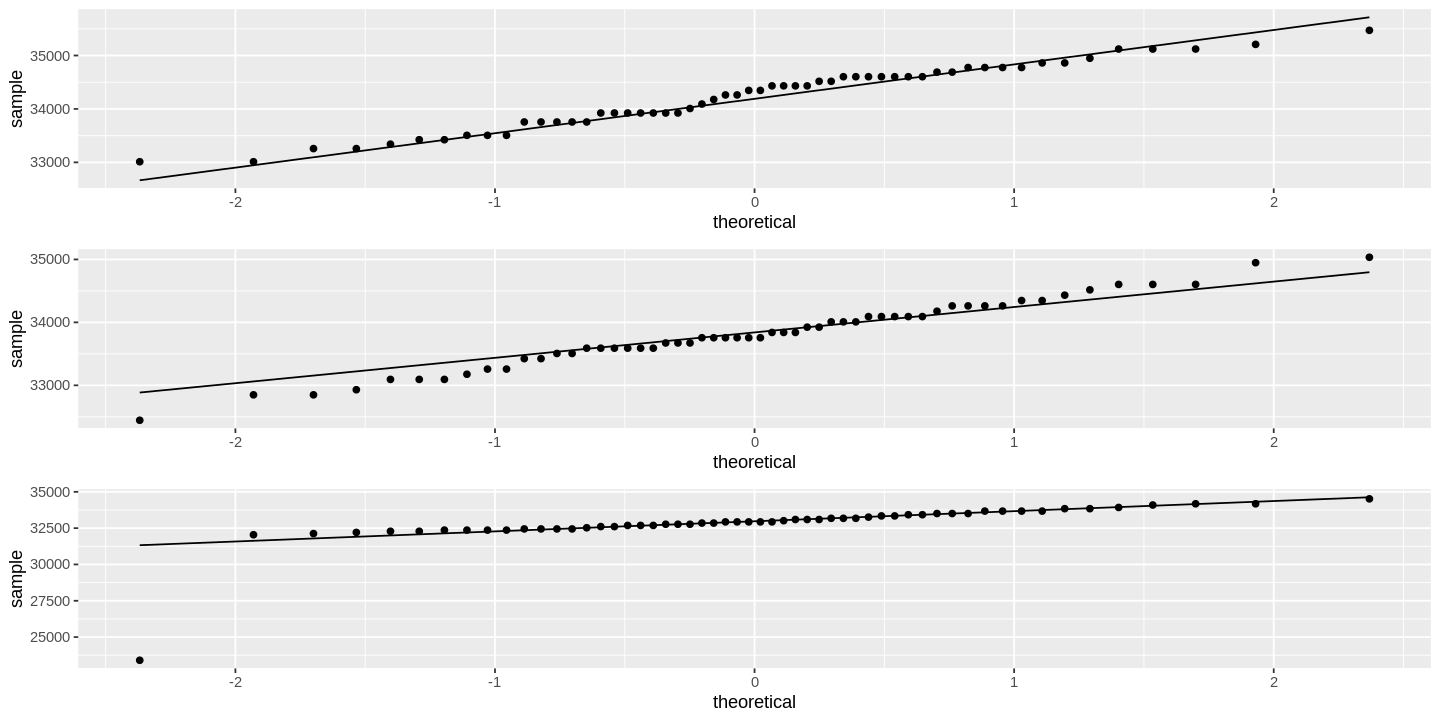

In [89]:
# 96 CORE 
grid.arrange(p_qq_96cr_mfi[[1]],p_qq_96cr_mfi[[2]], p_qq_96cr_mfi[[3]], nrow = 3)

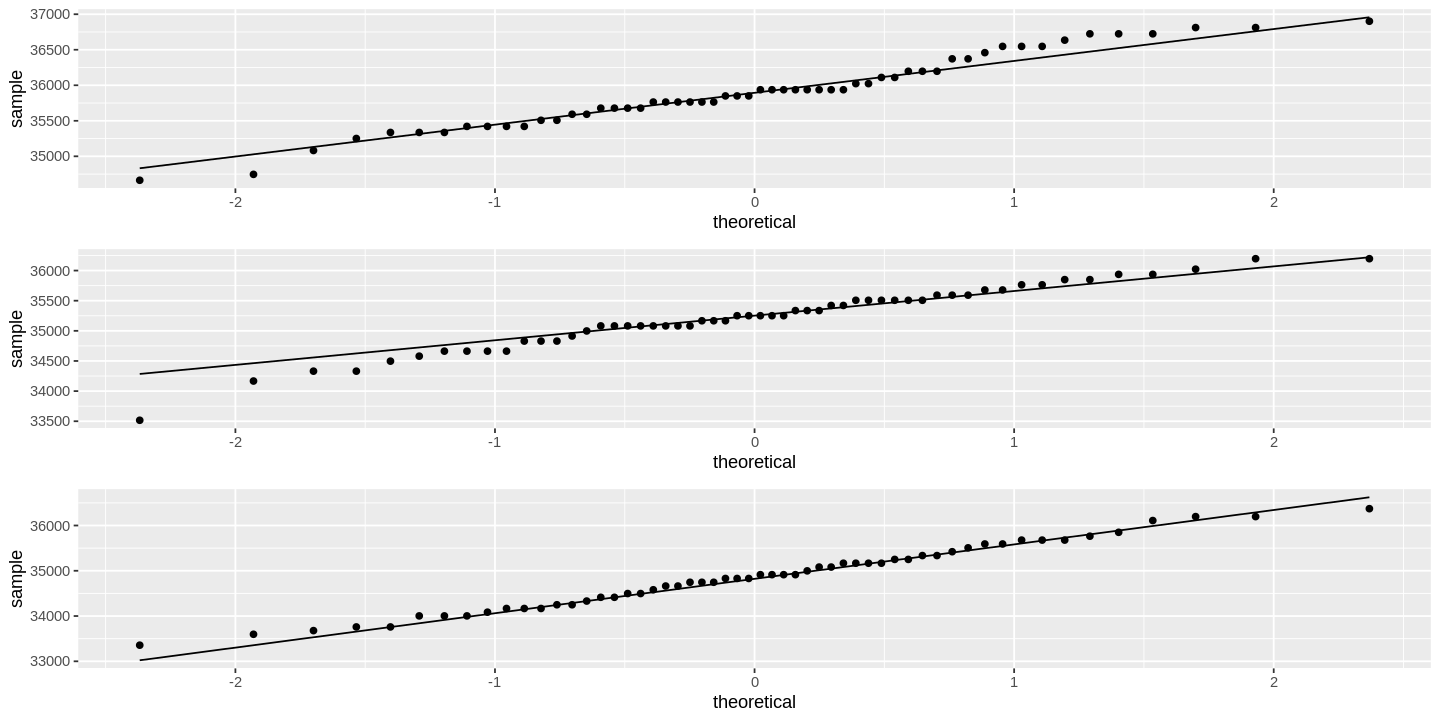

In [90]:
# 8 channel
grid.arrange(p_qq_8chl_mfi[[1]],p_qq_8chl_mfi[[2]], p_qq_8chl_mfi[[3]], nrow = 3)

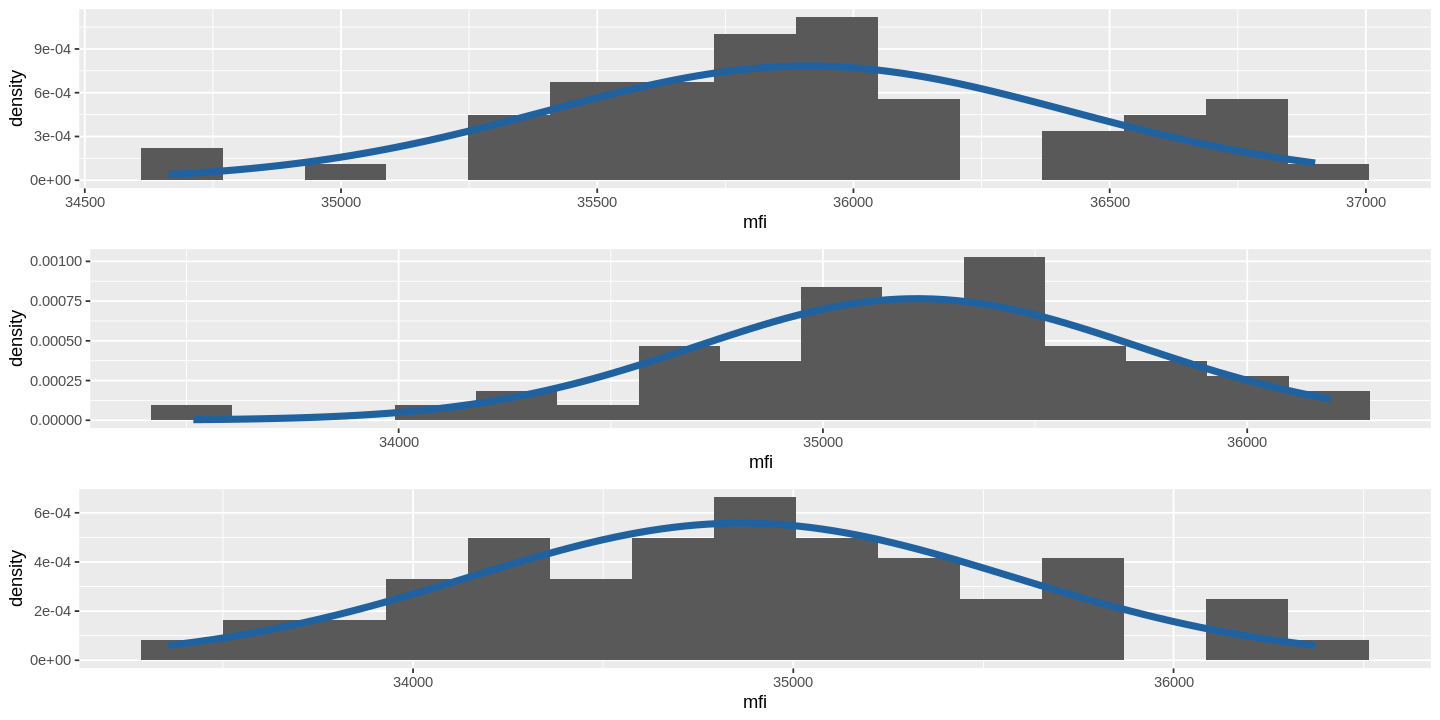

In [91]:
# 8 channel
grid.arrange(p_hst_8chl_mfi[[1]], p_hst_8chl_mfi[[2]], p_hst_8chl_mfi[[3]], nrow = 3)

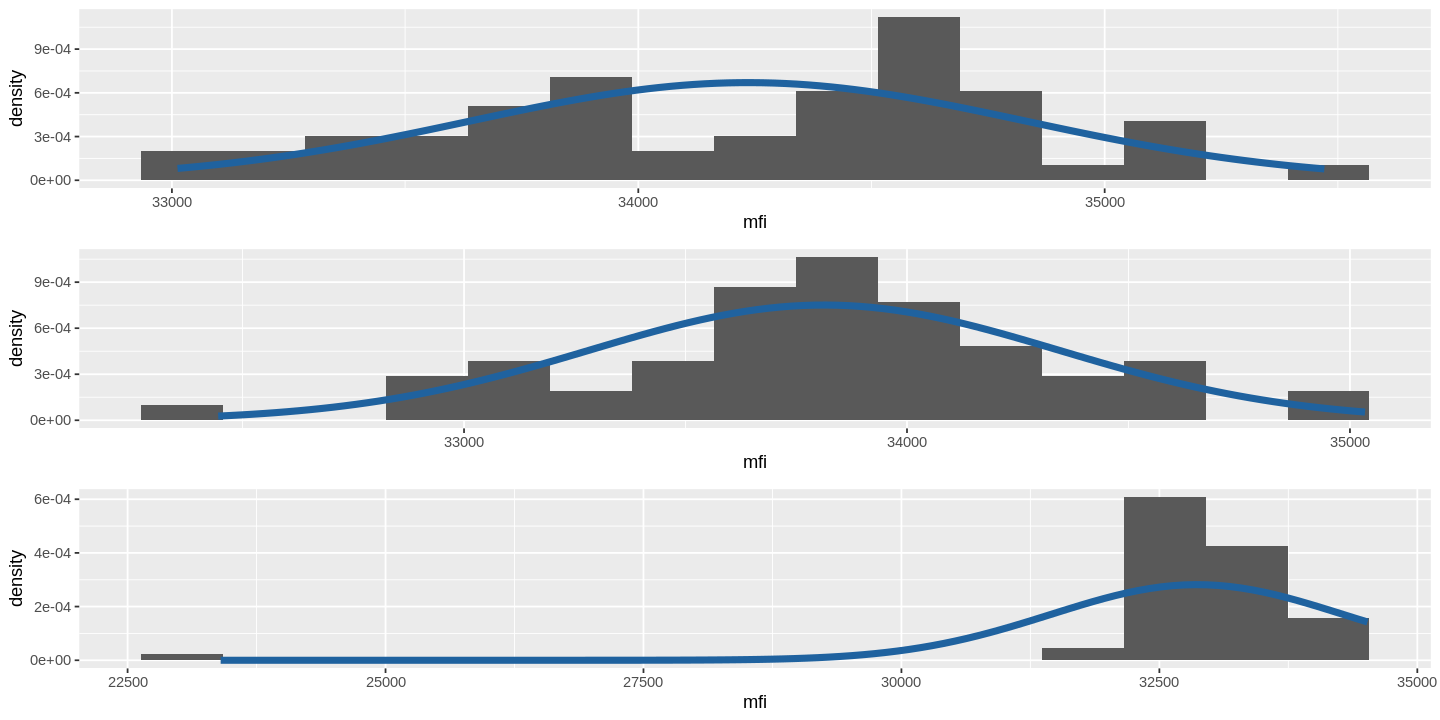

In [92]:
# 96 CORE
grid.arrange(p_hst_96cr_mfi[[1]], p_hst_96cr_mfi[[2]], p_hst_96cr_mfi[[3]], nrow = 3)

#### Violin plots

In [93]:
# It is similar to a box plot, with the addition of a rotated kernel density plot on each side
df_violin_8chl_cmb <- rbind(df_violin_8chl_mfi[[1]], df_violin_8chl_mfi[[2]], df_violin_8chl_mfi[[3]])
df_violin_96cr_cmb <- rbind(df_violin_96cr_mfi[[1]], df_violin_96cr_mfi[[2]], df_violin_96cr_mfi[[3]])

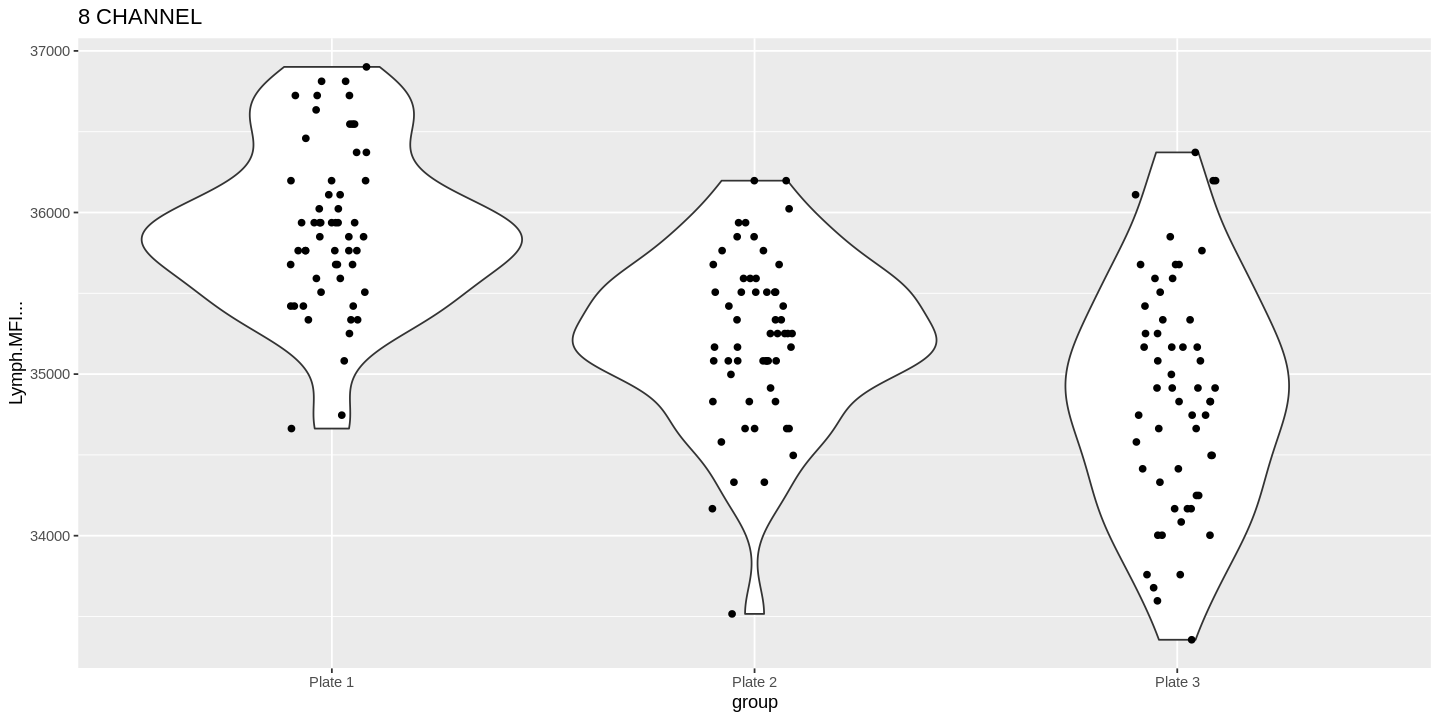

In [94]:
# 3 plates per set
ggplot(df_violin_8chl_cmb, aes(group, Lymph.MFI...)) + 
    geom_violin() + 
    geom_jitter(height = 0, width = 0.1) +
    ggtitle("8 CHANNEL")

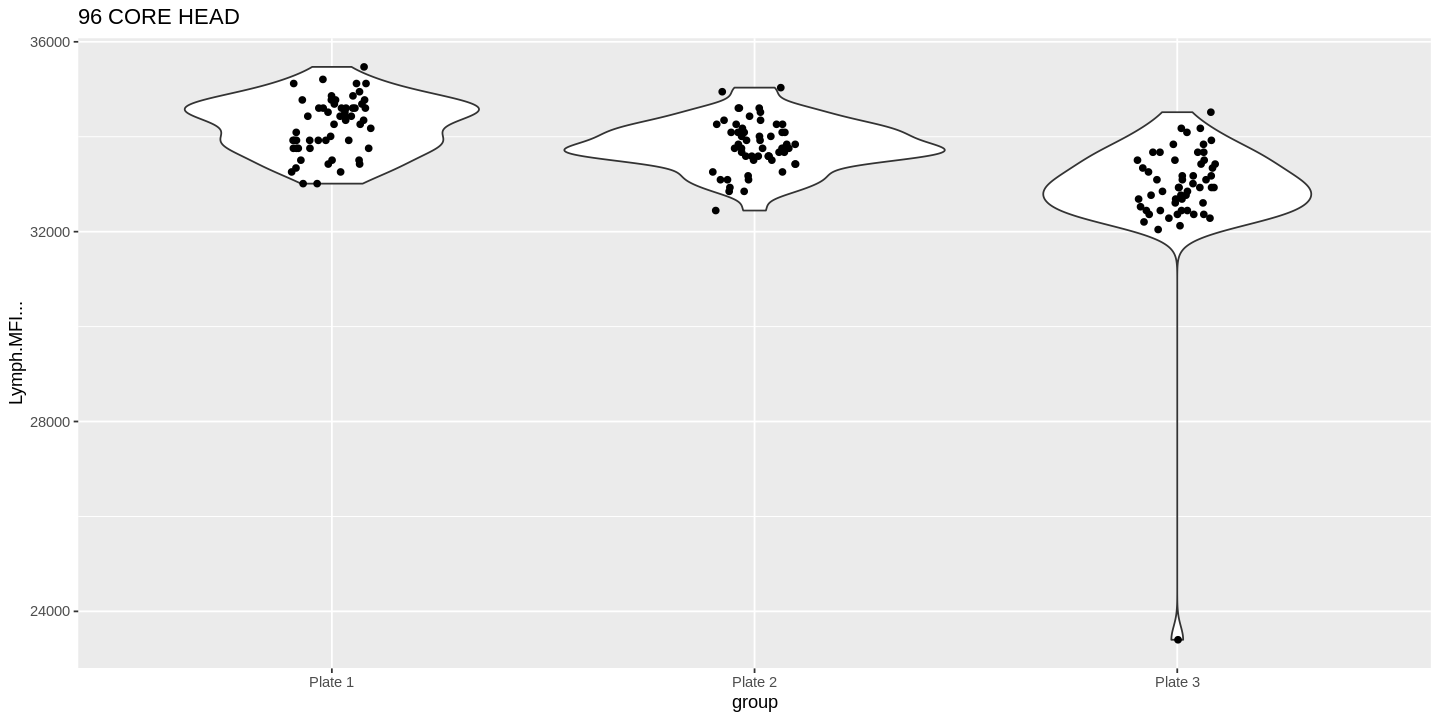

In [95]:
# 3 plates per set
ggplot(df_violin_96cr_cmb, aes(group, Lymph.MFI...)) + 
    geom_violin() + 
    geom_jitter(height = 0, width = 0.1) +
    ggtitle("96 CORE HEAD")

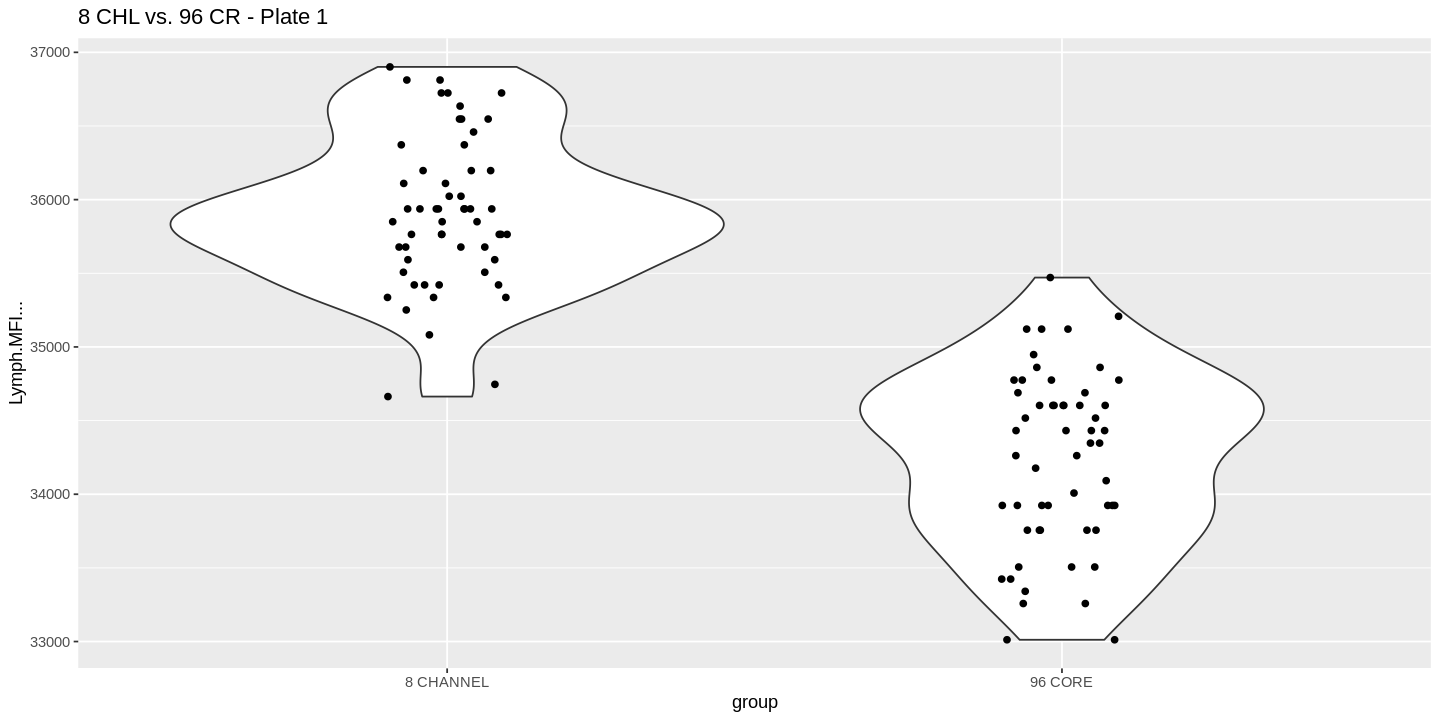

In [96]:
# comparing plate 1 of both methods
df1 <- df_violin_8chl_mfi[[1]] %>% mutate(group = "8 CHANNEL")
df2 <- df_violin_96cr_mfi[[1]] %>% mutate(group = "96 CORE")
dff <- bind_rows(df1, df2)
ggplot(dff, aes(group, Lymph.MFI...)) + 
    geom_violin() + 
    geom_jitter(height = 0, width = 0.1) +
    ggtitle("8 CHL vs. 96 CR - Plate 1")

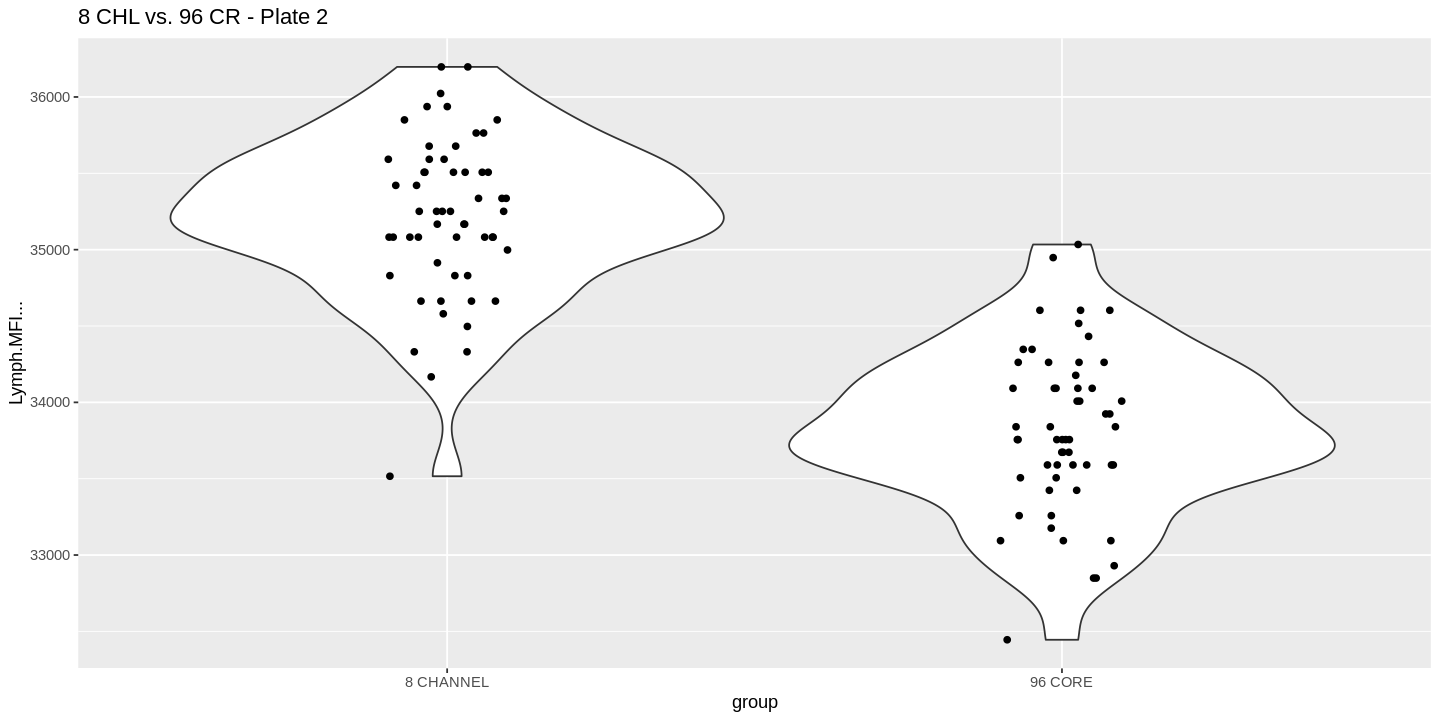

In [97]:
df1 <- df_violin_8chl_mfi[[2]] %>% mutate(group = "8 CHANNEL")
df2 <- df_violin_96cr_mfi[[2]] %>% mutate(group = "96 CORE")
dff <- bind_rows(df1, df2)

ggplot(dff, aes(group, Lymph.MFI...)) + 
    geom_violin() + 
    geom_jitter(height = 0, width = 0.1) +
    ggtitle("8 CHL vs. 96 CR - Plate 2")

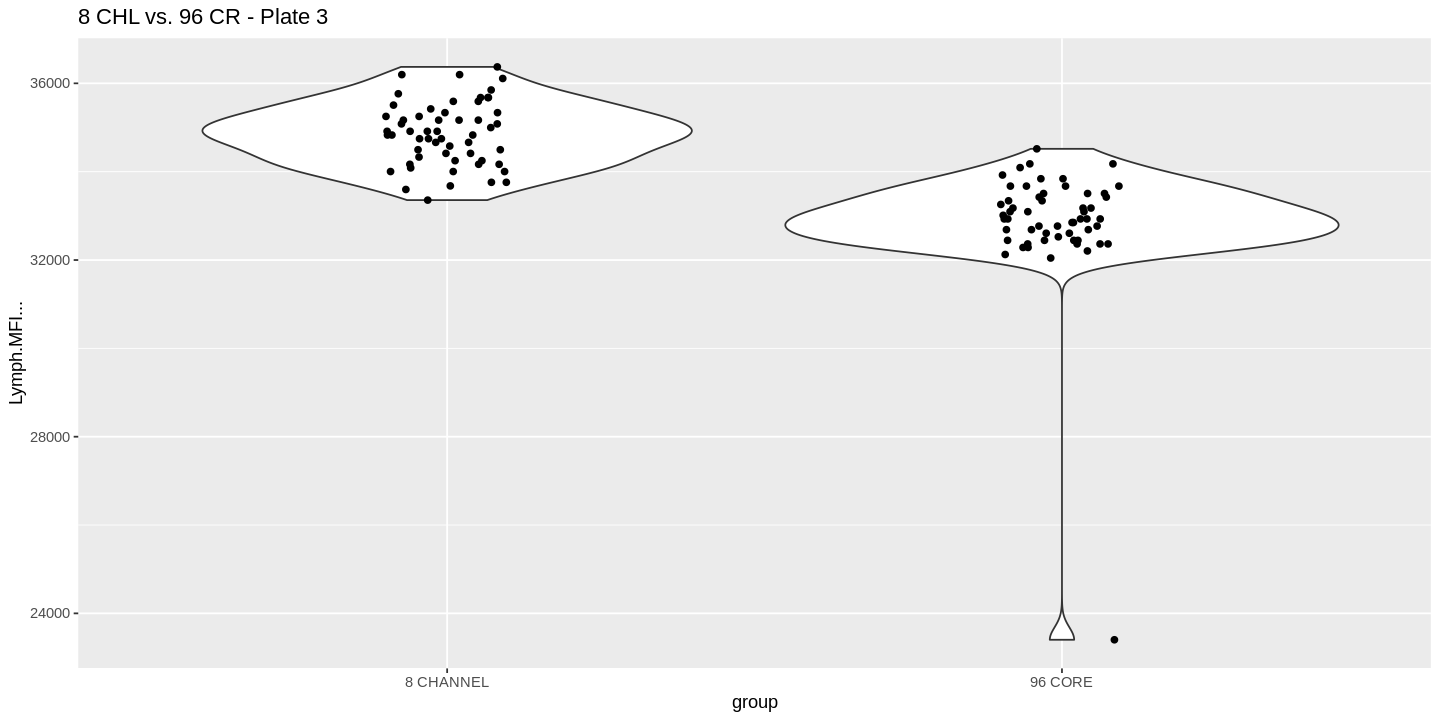

In [98]:
df1 <- df_violin_8chl_mfi[[3]] %>% mutate(group = "8 CHANNEL")
df2 <- df_violin_96cr_mfi[[3]] %>% mutate(group = "96 CORE")
dff <- bind_rows(df1, df2)

ggplot(dff, aes(group, Lymph.MFI...)) + 
    geom_violin() + 
    geom_jitter(height = 0, width = 0.1) +
    ggtitle("8 CHL vs. 96 CR - Plate 3")

### Box plots and t-test 

In [99]:
df.8chl.mfi.cmb <- rbind(mfi.pos.8chl[[1]], mfi.pos.8chl[[2]], mfi.pos.8chl[[3]])

In [100]:
summary(df.8chl.mfi.cmb)

      mfi.          group          
 Min.   :33356   Length:168        
 1st Qu.:34830   Class :character  
 Median :35378   Mode  :character  
 Mean   :35332                     
 3rd Qu.:35850                     
 Max.   :36901                     

In [101]:
df.96cr.mfi.cmb <- rbind(mfi.pos.96cr[[1]], mfi.pos.96cr[[2]], mfi.pos.96cr[[3]])

In [102]:
summary(df.96cr.mfi.cmb)

      mfi.          group          
 Min.   :23402   Length:168        
 1st Qu.:33094   Class :character  
 Median :33756   Mode  :character  
 Mean   :33637                     
 3rd Qu.:34262                     
 Max.   :35471                     

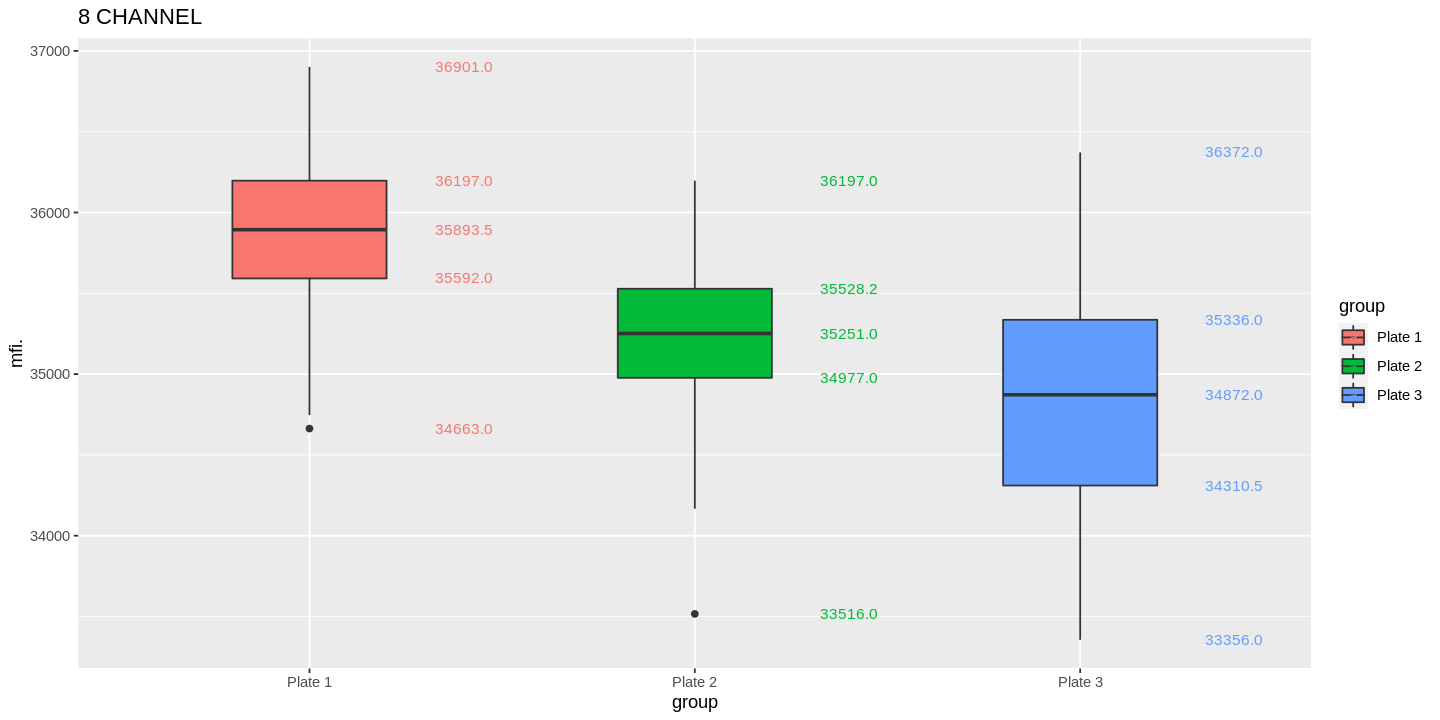

In [103]:
ggplot(df.8chl.mfi.cmb, aes(group, mfi.,fill=group)) +
    geom_boxplot(width = 0.4) + 
    stat_summary(geom="text", fun=quantile,
           aes(label=sprintf("%1.1f", ..y..), color=group),
           position=position_nudge(x=0.4), size=3.25) +
    ggtitle("8 CHANNEL")

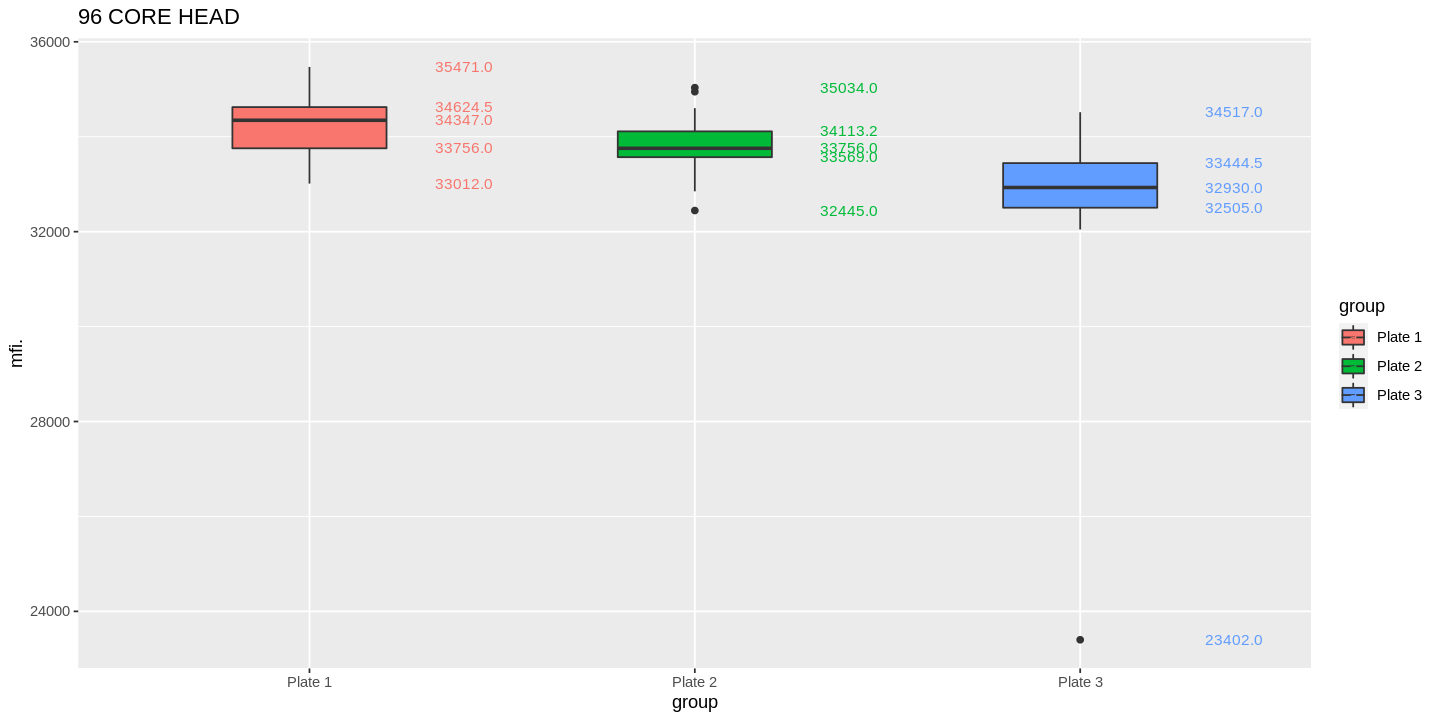

In [104]:
ggplot(df.96cr.mfi.cmb, aes(group, mfi.,fill=group)) +
    geom_boxplot(width = 0.4) + 
    stat_summary(geom="text", fun=quantile,
           aes(label=sprintf("%1.1f", ..y..), color=group),
           position=position_nudge(x=0.4), size=3.25) +
    ggtitle("96 CORE HEAD")

In [105]:
# pool all three sets and run t-test to compare 
t.test(df.8chl.mfi.cmb$mfi., df.96cr.mfi.cmb$mfi., 
       alternative = "two.sided",
       paired = FALSE, var.equal = FALSE,
       conf.level = 0.95) 


	Welch Two Sample t-test

data:  df.8chl.mfi.cmb$mfi. and df.96cr.mfi.cmb$mfi.
t = 16.68, df = 290.98, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1494.527 1894.390
sample estimates:
mean of x mean of y 
 35331.92  33637.46 


In [106]:
# t-test on plate 1 of both 8 channel & 96 CORE
t.test(mfi.pos.8chl[[1]]$mfi., mfi.pos.96cr[[1]]$mfi.,
       alternative = "two.sided",
       paired = FALSE, var.equal = F,
       conf.level = 0.95) 


	Welch Two Sample t-test

data:  mfi.pos.8chl[[1]]$mfi. and mfi.pos.96cr[[1]]$mfi.
t = 16.001, df = 107.44, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1468.187 1883.385
sample estimates:
mean of x mean of y 
 35910.84  34235.05 


In [108]:
# t-test on plate 2 of both 8 channel & 96 CORE
t.test(mfi.pos.8chl[[2]]$mfi., mfi.pos.96cr[[2]]$mfi.,
       alternative = "two.sided",
       paired = FALSE, var.equal = F,
       conf.level = 0.95) 


	Welch Two Sample t-test

data:  mfi.pos.8chl[[2]]$mfi. and mfi.pos.96cr[[2]]$mfi.
t = 14.169, df = 109.96, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1212.142 1606.358
sample estimates:
mean of x mean of y 
 35221.98  33812.73 


In [109]:
# t-test on plate 3 of both 8 channel & 96 CORE
t.test(mfi.pos.8chl[[3]]$mfi., mfi.pos.96cr[[3]]$mfi.,
       alternative = "two.sided",
       paired = FALSE, var.equal = F,
       conf.level = 0.95) 


	Welch Two Sample t-test

data:  mfi.pos.8chl[[3]]$mfi. and mfi.pos.96cr[[3]]$mfi.
t = 9.4292, df = 81.336, p-value = 1.086e-14
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1576.691 2419.987
sample estimates:
mean of x mean of y 
 34862.95  32864.61 


### XmR charts to show data series

In [110]:
# generate well ids for x-axis 
wellIDs <- as.vector(sapply(LETTERS[1:8], function(x) {paste0(x,seq(2,8))}))

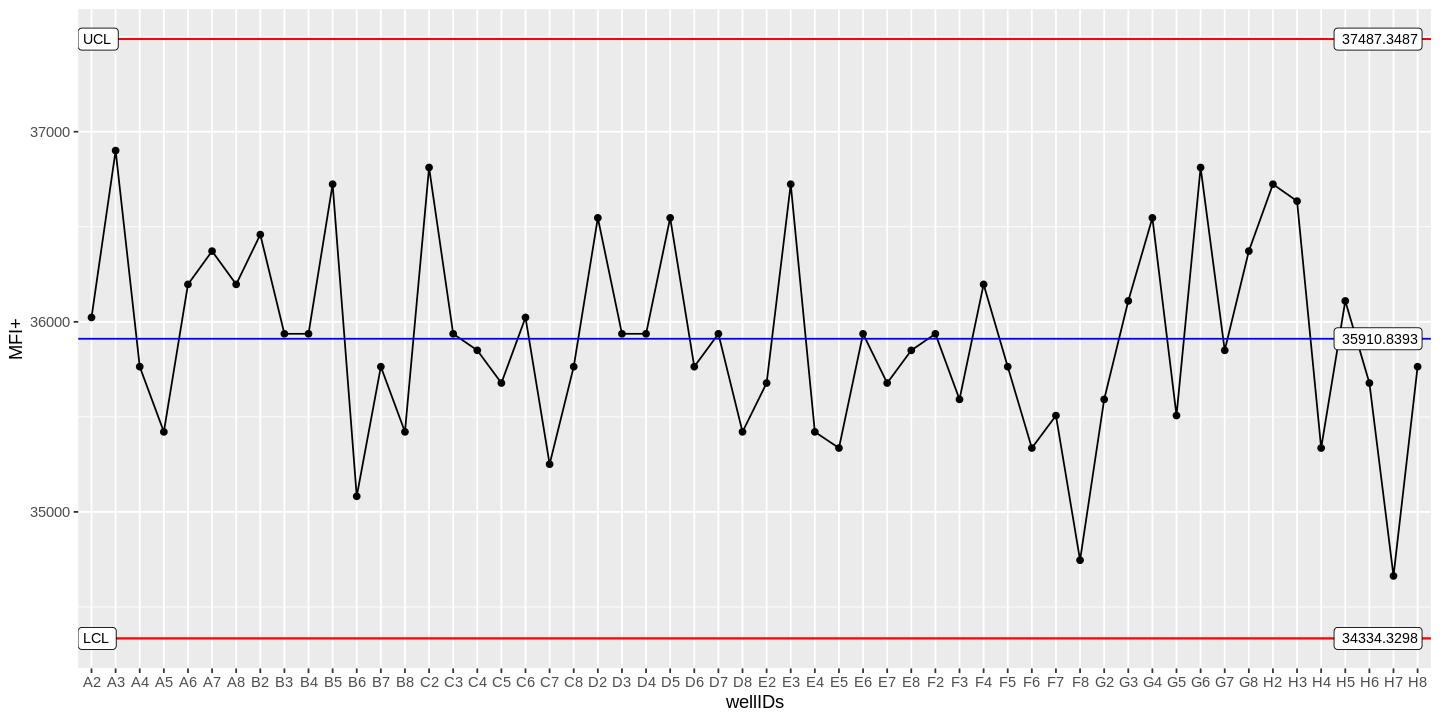

In [111]:
# 8 chl plate 1
ggplot(mfi.pos.8chl[[1]], aes(x=wellIDs, y=mfi., group=group)) +
  geom_point() + geom_line() +
  stat_QC(method="XmR", auto.label = T, label.digits = 4) + 
  ylab("MFI+") +
  scale_x_discrete(expand =  expansion(mult = .01))

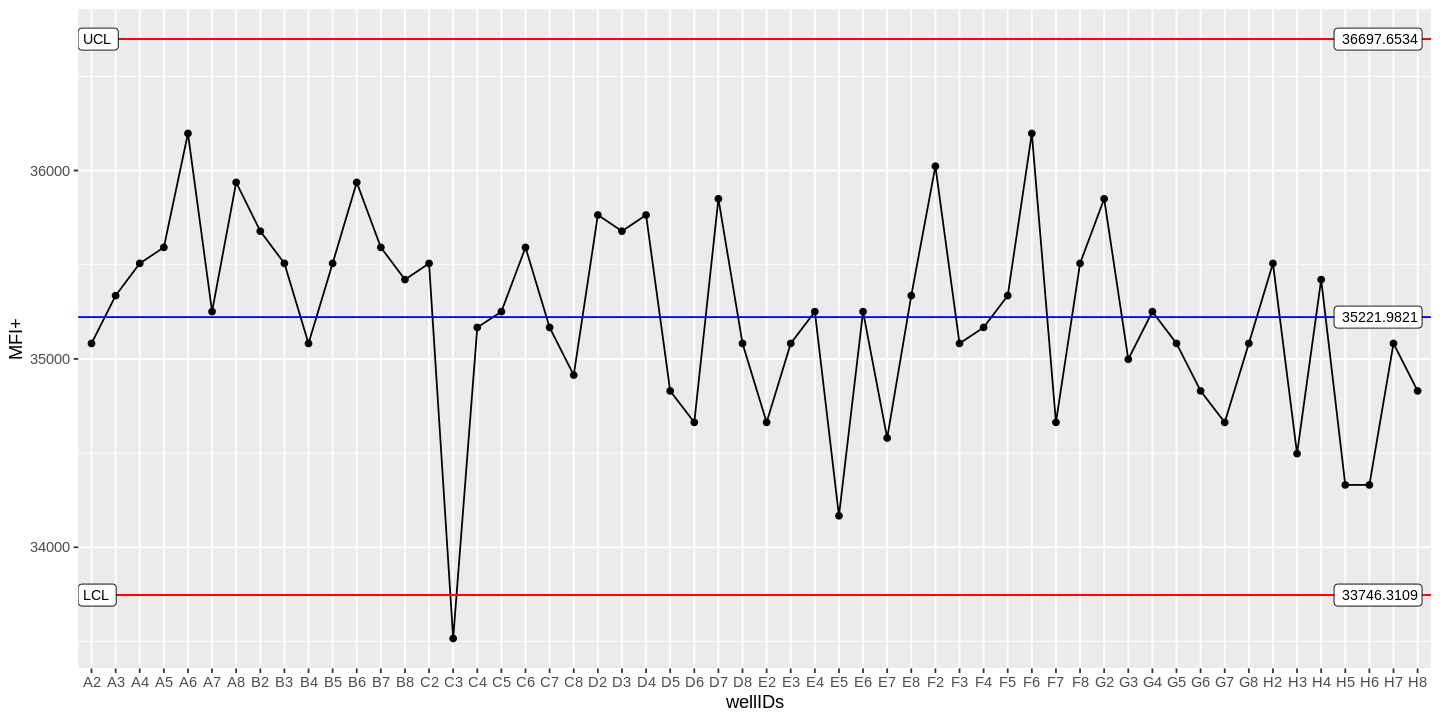

In [112]:
# 8 chl plate 2
ggplot(mfi.pos.8chl[[2]], aes(x=wellIDs, y=mfi., group=group)) +
  geom_point() + geom_line() +
  stat_QC(method="XmR", auto.label = T, label.digits = 4) + 
  ylab("MFI+") +
  scale_x_discrete(expand =  expansion(mult = .01))

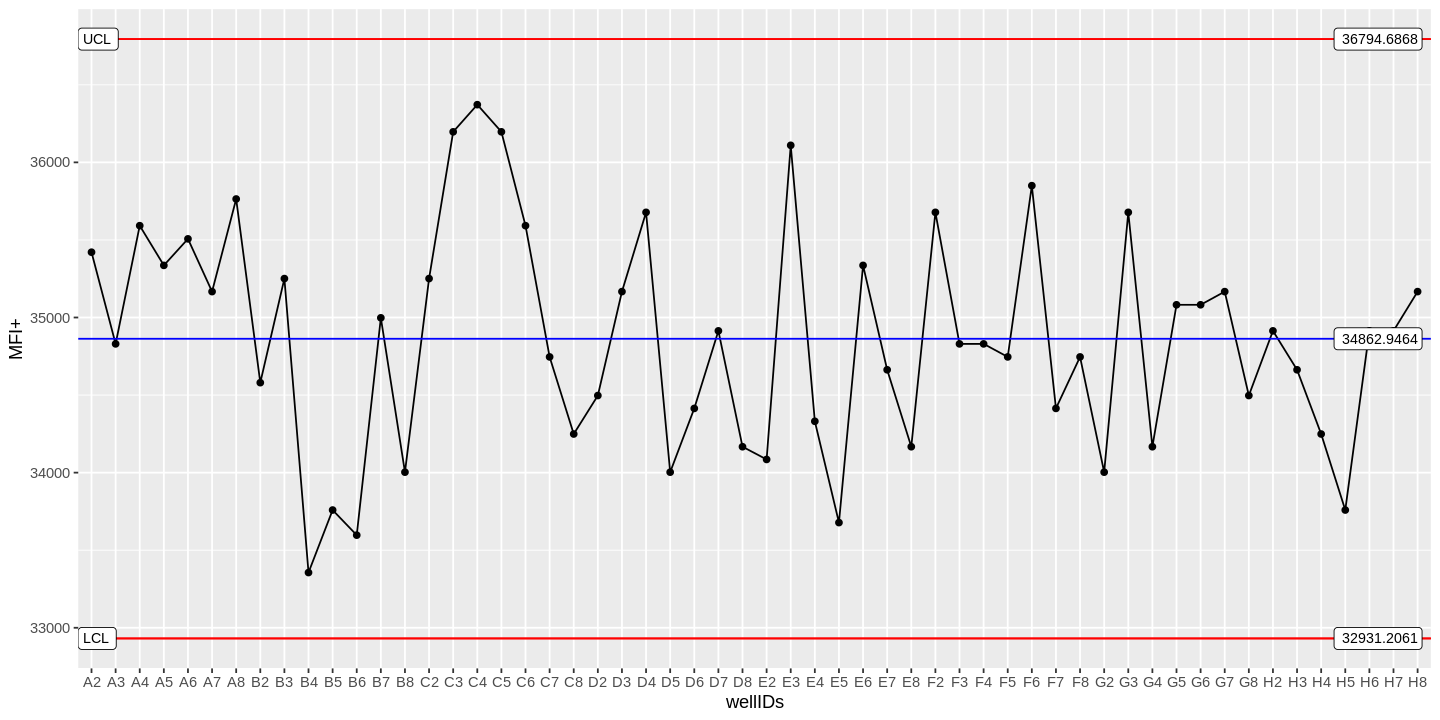

In [113]:
# 8 chl plate 3
ggplot(mfi.pos.8chl[[3]], aes(x=wellIDs, y=mfi., group=group)) +
  geom_point() + geom_line() +
  stat_QC(method="XmR", auto.label = T, label.digits = 4) + 
  ylab("MFI+") +
  scale_x_discrete(expand =  expansion(mult = .01))

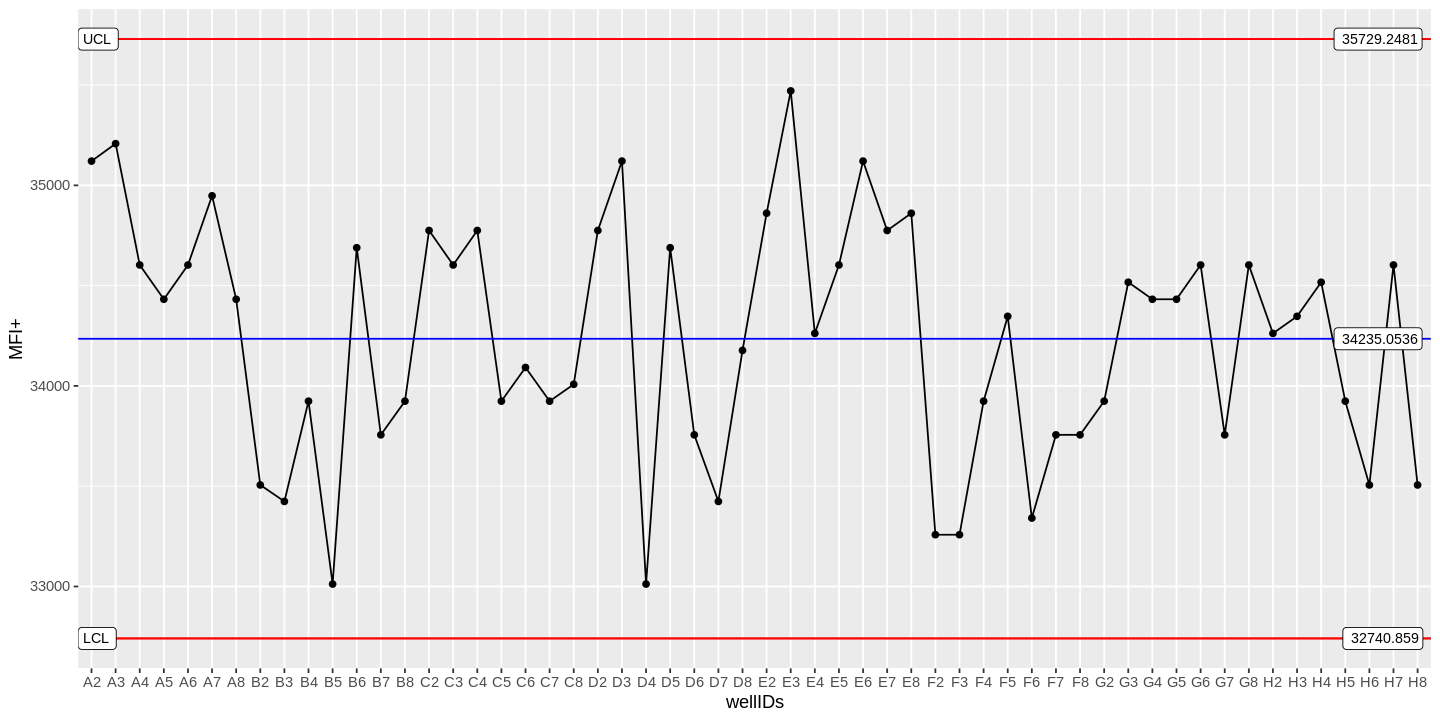

In [114]:
# 96 plate 1
ggplot(mfi.pos.96cr[[1]], aes(x=wellIDs, y=mfi., group=group)) +
  geom_point() + geom_line() +
  stat_QC(method="XmR", auto.label = T, label.digits = 4) + 
  ylab("MFI+") +
  scale_x_discrete(expand =  expansion(mult = .01))

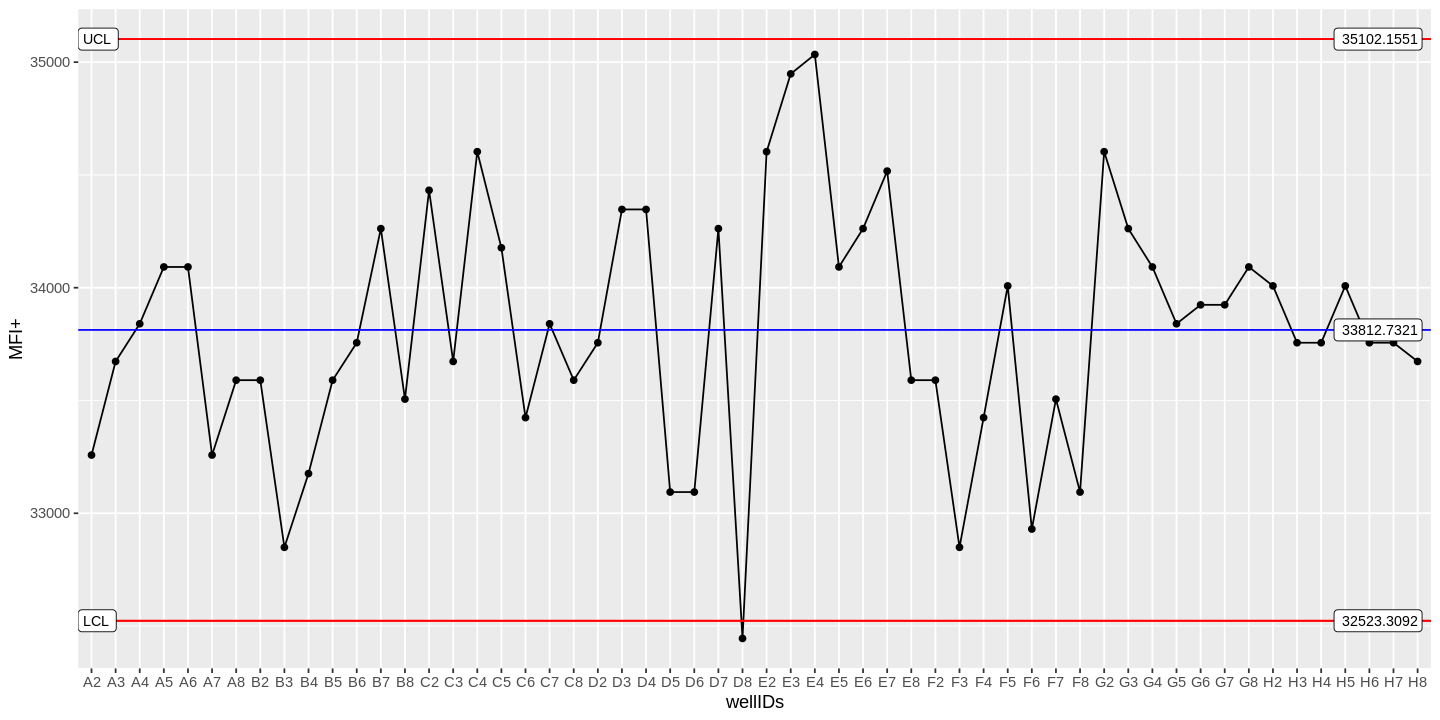

In [115]:
# 96 plate 2
ggplot(mfi.pos.96cr[[2]], aes(x=wellIDs, y=mfi., group=group)) +
  geom_point() + geom_line() +
  stat_QC(method="XmR", auto.label = T, label.digits = 4) + 
  ylab("MFI+") +
  scale_x_discrete(expand =  expansion(mult = .01))

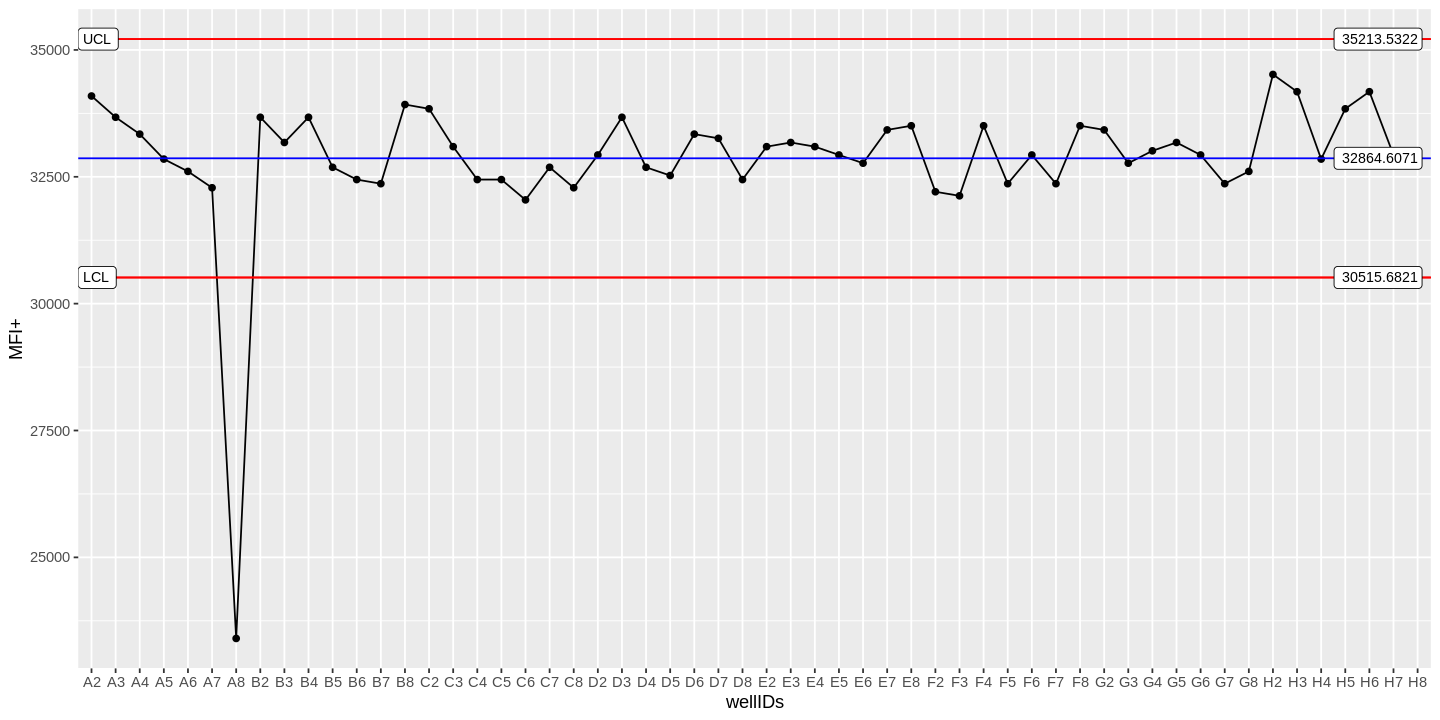

In [116]:
# 96 plate 3
ggplot(mfi.pos.96cr[[3]], aes(x=wellIDs, y=mfi., group=group)) +
  geom_point() + geom_line() +
  stat_QC(method="XmR", auto.label = T, label.digits = 4) + 
  ylab("MFI+") +
  scale_x_discrete(expand =  expansion(mult = .01))

##### XbarR Charts (subgroup size = row)
- as an entire dataset (plates 1-3)

In [117]:
dff.96cr.mfi <- cbind(df.96cr.mfi.cmb, row=rep(c("A","B","C","D","E","F","G","H"), each=7))
head(dff.96cr.mfi)

,mfi.,group,row
,<dbl>,<chr>,<chr>
1,35121,Plate 1,A
2,35208,Plate 1,A
3,34603,Plate 1,A
4,34432,Plate 1,A
5,34603,Plate 1,A
6,34948,Plate 1,A


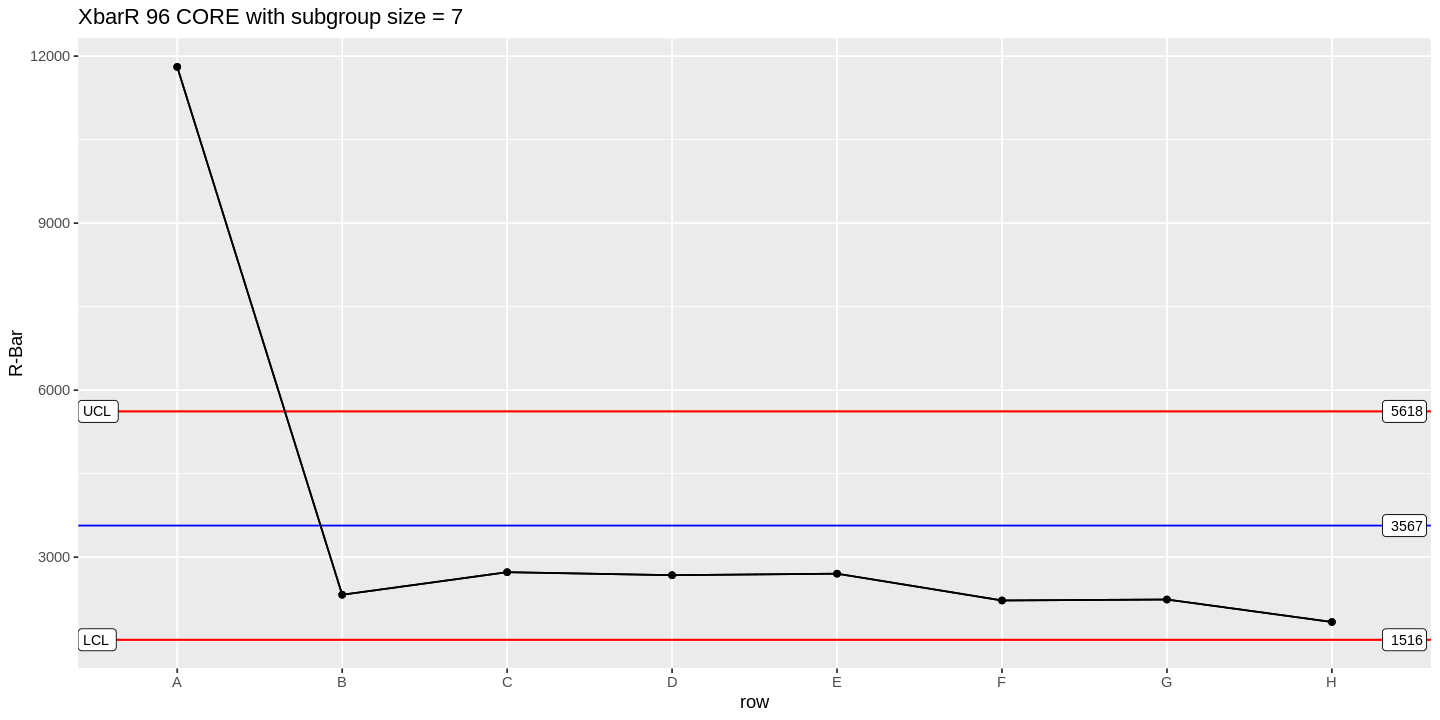

In [118]:
# the RANGE of each subgroup as an absolute diff
suppressWarnings(ggplot(dff.96cr.mfi, aes(x = row, y = mfi., group = 1)) +
         stat_summary(fun = QCrange, geom = "point") +
         stat_summary(fun = QCrange, geom = "line") +
         stat_QC(method="rBar") +
         stat_QC_labels(method="rBar") + ylab("R-Bar") +
         ggtitle("XbarR 96 CORE with subgroup size = 7"))

In [119]:
dff.8chl.mfi <- cbind(df.8chl.mfi.cmb, row=rep(c("A","B","C","D","E","F","G","H"), each=7))
head(dff.8chl.mfi)

,mfi.,group,row
,<dbl>,<chr>,<chr>
1,36023,Plate 1,A
2,36901,Plate 1,A
3,35764,Plate 1,A
4,35421,Plate 1,A
5,36197,Plate 1,A
6,36372,Plate 1,A


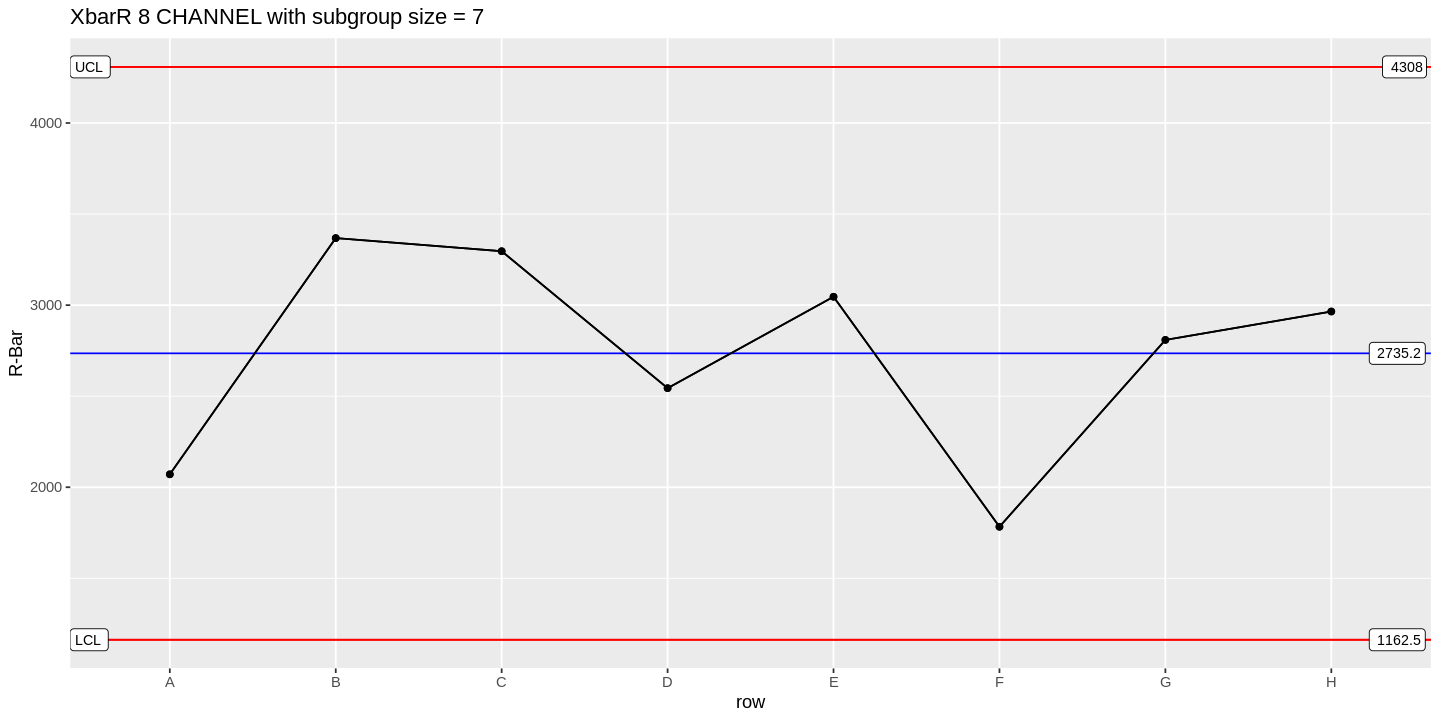

In [120]:
suppressWarnings(ggplot(dff.8chl.mfi, aes(x = row, y = mfi., group = 1)) +
         stat_summary(fun = QCrange, geom = "point") +
         stat_summary(fun = QCrange, geom = "line") +
         stat_QC(method="rBar") +
         stat_QC_labels(method="rBar") + ylab("R-Bar") +
         ggtitle("XbarR 8 CHANNEL with subgroup size = 7"))

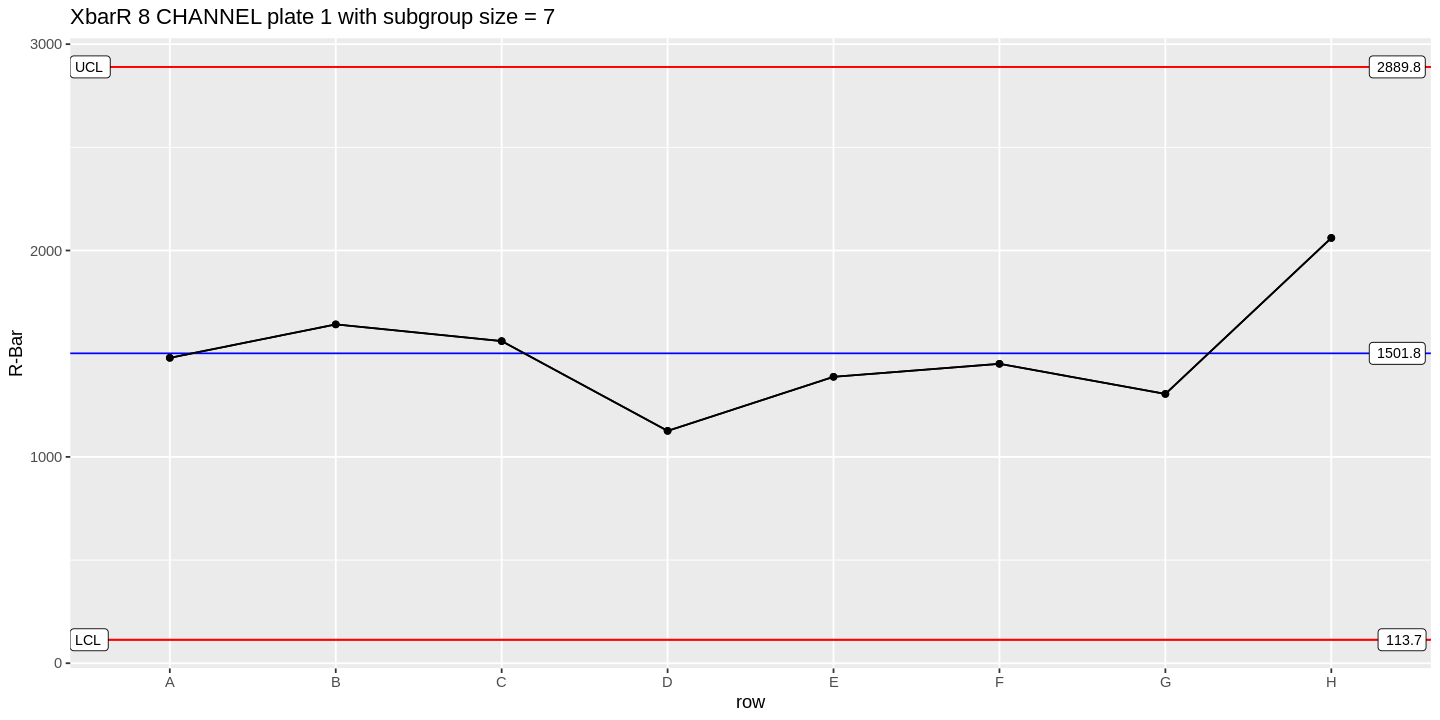

In [121]:
dff.8chl.mfi <- cbind(mfi.pos.8chl[[1]], row=rep(c("A","B","C","D","E","F","G","H"), each=7))
suppressWarnings(ggplot(dff.8chl.mfi, aes(x = row, y = mfi., group = 1)) +
         stat_summary(fun = QCrange, geom = "point") +
         stat_summary(fun = QCrange, geom = "line") +
         stat_QC(method="rBar") +
         stat_QC_labels(method="rBar") + ylab("R-Bar") +
         ggtitle("XbarR 8 CHANNEL plate 1 with subgroup size = 7"))

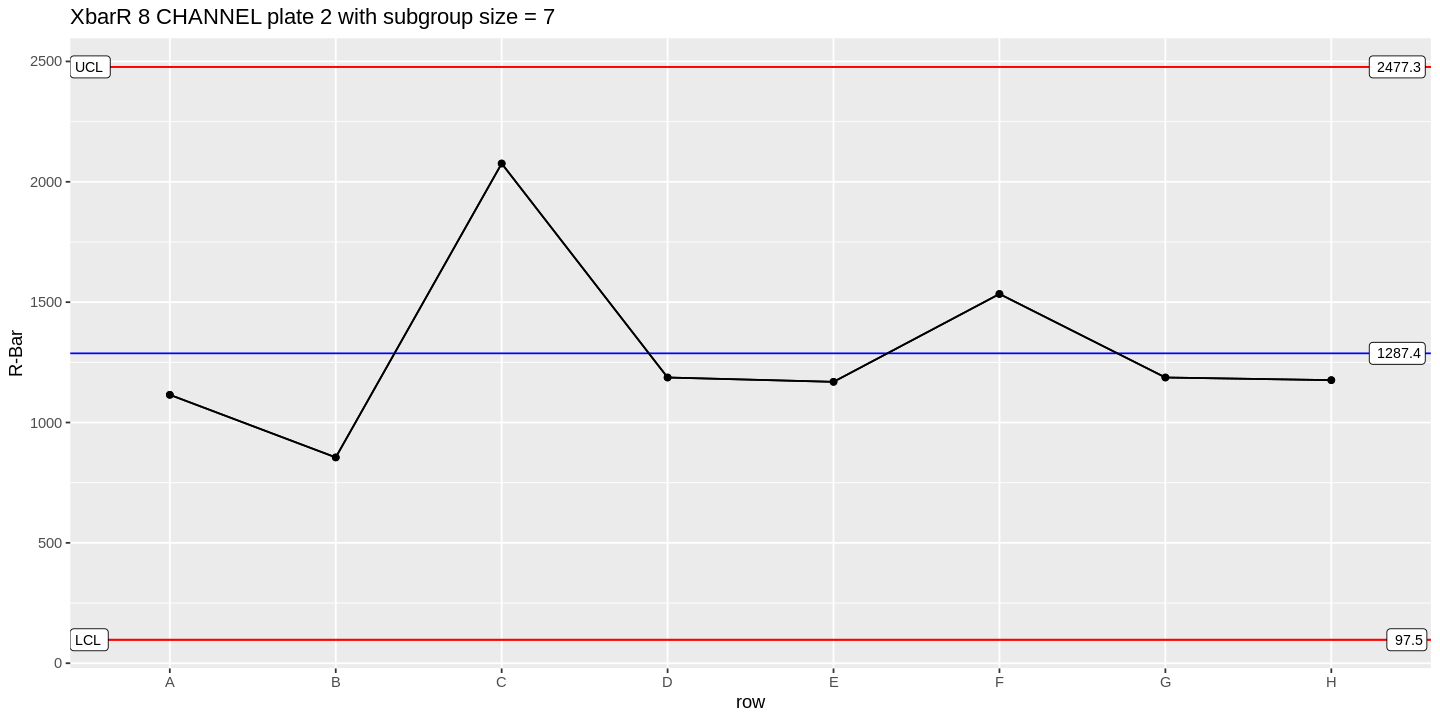

In [122]:
dff.8chl.mfi <- cbind(mfi.pos.8chl[[2]], row=rep(c("A","B","C","D","E","F","G","H"), each=7))
suppressWarnings(ggplot(dff.8chl.mfi, aes(x = row, y = mfi., group = 1)) +
         stat_summary(fun = QCrange, geom = "point") +
         stat_summary(fun = QCrange, geom = "line") +
         stat_QC(method="rBar") +
         stat_QC_labels(method="rBar") + ylab("R-Bar") +
         ggtitle("XbarR 8 CHANNEL plate 2 with subgroup size = 7"))

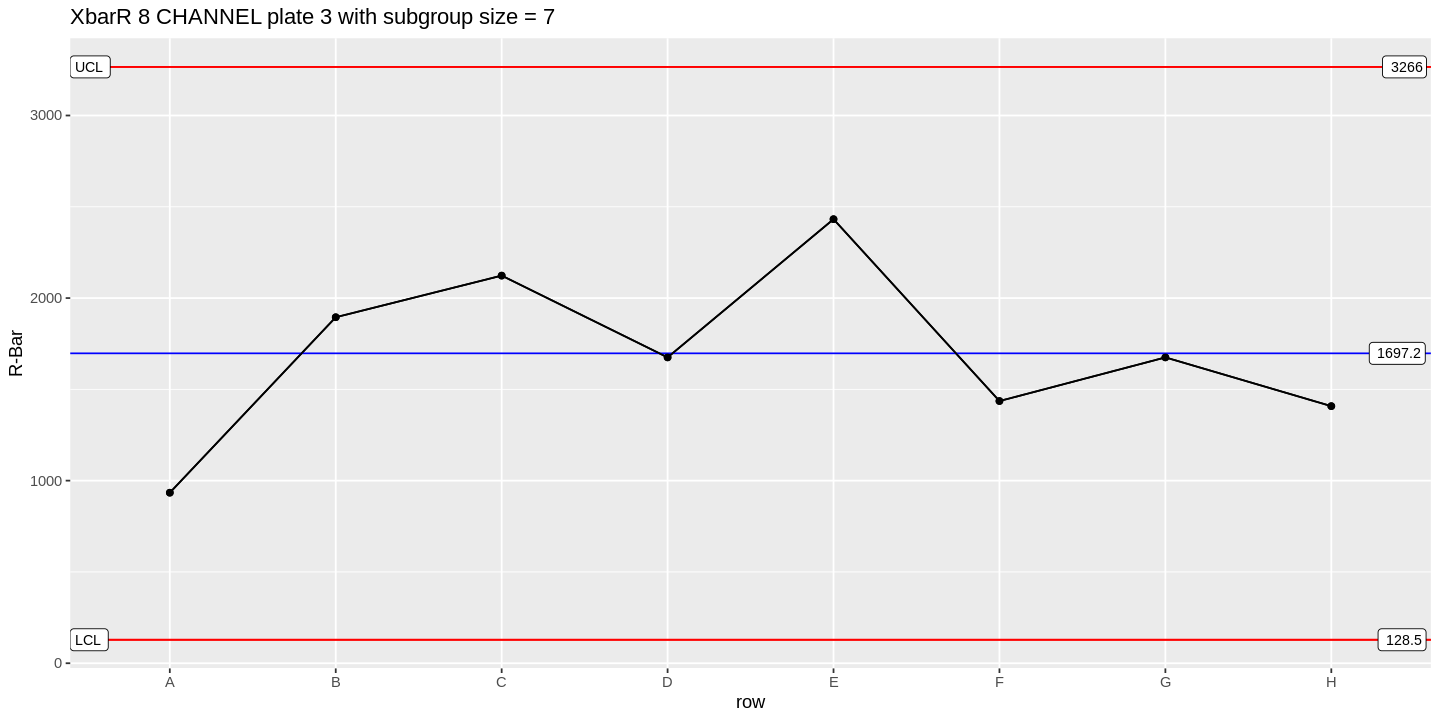

In [123]:
dff.8chl.mfi <- cbind(mfi.pos.8chl[[3]], row=rep(c("A","B","C","D","E","F","G","H"), each=7))
suppressWarnings(ggplot(dff.8chl.mfi, aes(x = row, y = mfi., group = 1)) +
         stat_summary(fun = QCrange, geom = "point") +
         stat_summary(fun = QCrange, geom = "line") +
         stat_QC(method="rBar") +
         stat_QC_labels(method="rBar") + ylab("R-Bar") +
         ggtitle("XbarR 8 CHANNEL plate 3 with subgroup size = 7"))

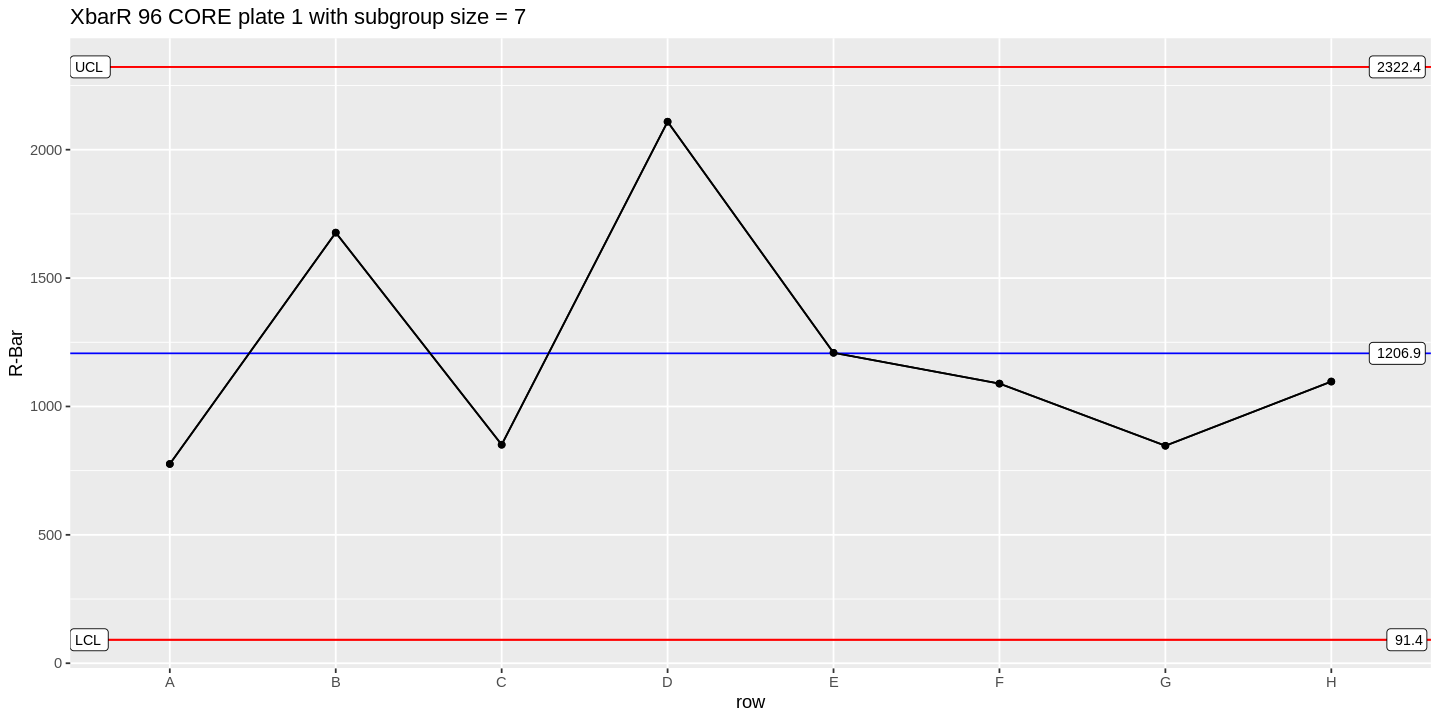

In [124]:
dff.96cr.mfi <- cbind(mfi.pos.96cr[[1]], row=rep(c("A","B","C","D","E","F","G","H"), each=7))
suppressWarnings(ggplot(dff.96cr.mfi, aes(x = row, y = mfi., group = 1)) +
         stat_summary(fun = QCrange, geom = "point") +
         stat_summary(fun = QCrange, geom = "line") +
         stat_QC(method="rBar") +
         stat_QC_labels(method="rBar") + ylab("R-Bar") +
         ggtitle("XbarR 96 CORE plate 1 with subgroup size = 7"))

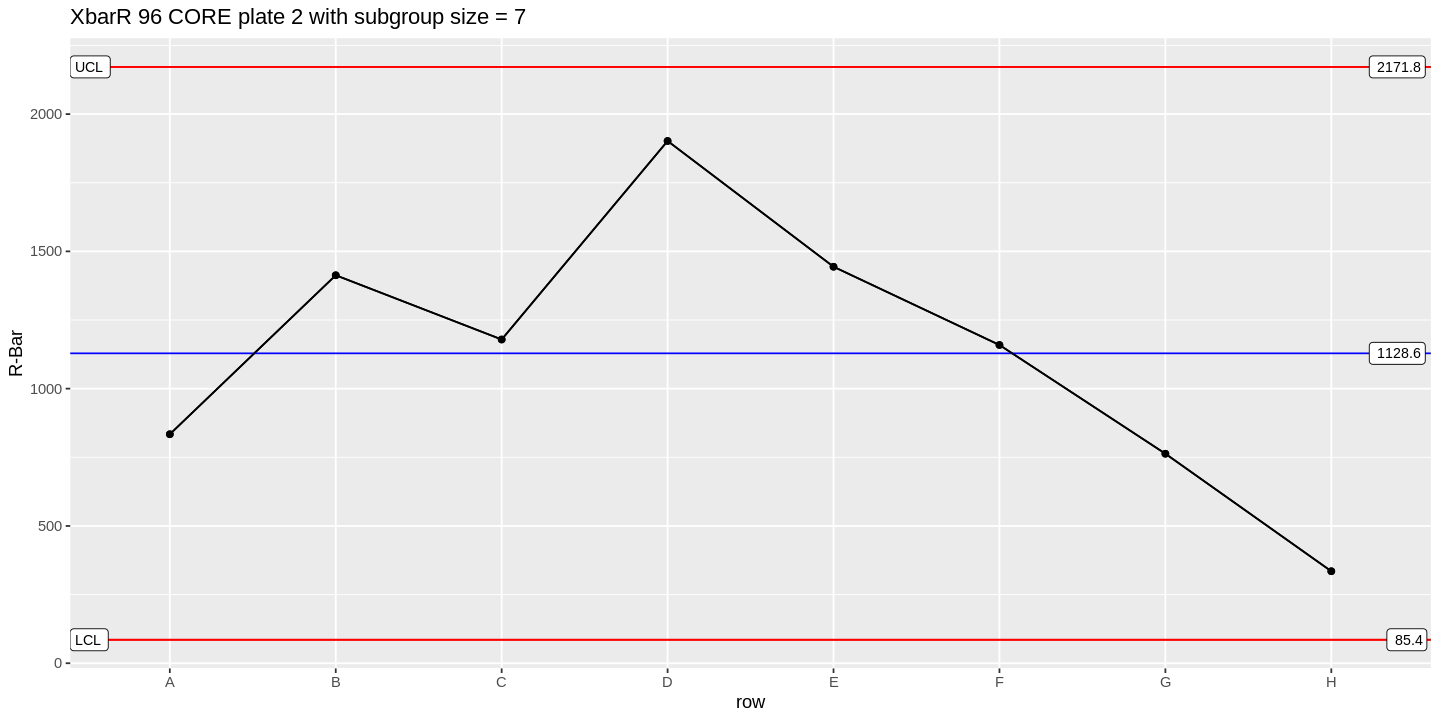

In [125]:
dff.96cr.mfi <- cbind(mfi.pos.96cr[[2]], row=rep(c("A","B","C","D","E","F","G","H"), each=7))
suppressWarnings(ggplot(dff.96cr.mfi, aes(x = row, y = mfi., group = 1)) +
         stat_summary(fun = QCrange, geom = "point") +
         stat_summary(fun = QCrange, geom = "line") +
         stat_QC(method="rBar") +
         stat_QC_labels(method="rBar") + ylab("R-Bar") +
         ggtitle("XbarR 96 CORE plate 2 with subgroup size = 7"))

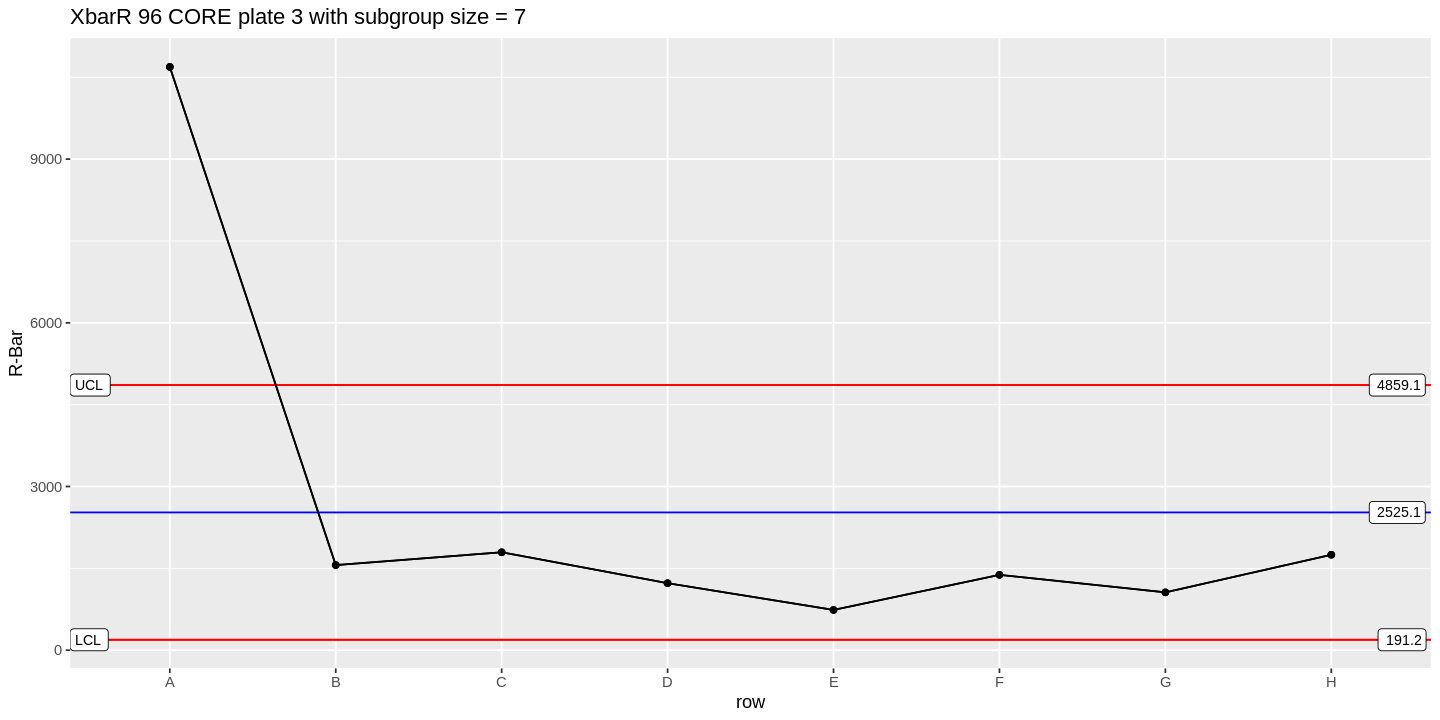

In [126]:
dff.96cr.mfi <- cbind(mfi.pos.96cr[[3]], row=rep(c("A","B","C","D","E","F","G","H"), each=7))
suppressWarnings(ggplot(dff.96cr.mfi, aes(x = row, y = mfi., group = 1)) +
         stat_summary(fun = QCrange, geom = "point") +
         stat_summary(fun = QCrange, geom = "line") +
         stat_QC(method="rBar") +
         stat_QC_labels(method="rBar") + ylab("R-Bar") +
         ggtitle("XbarR 96 CORE plate 3 with subgroup size = 7"))

# Conclusion

- Seems as though the experiment is not setup for statistically convincing data
- May be inherent to flow cytometry experiments
- Or could design a new experiment:
    - Run 1 plate at a time, 2x for 8 channel and 96 core head
    - After each plate finishes, immediately wash and start on flow cytometer (use 2x cytometers; this will help even out inherent variances that can be pooled)
    - Perhaps use a real cell counter and count cells of a plate to compare against the X20
    - Append to current dataset cell count with n=3 prior to washing